## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

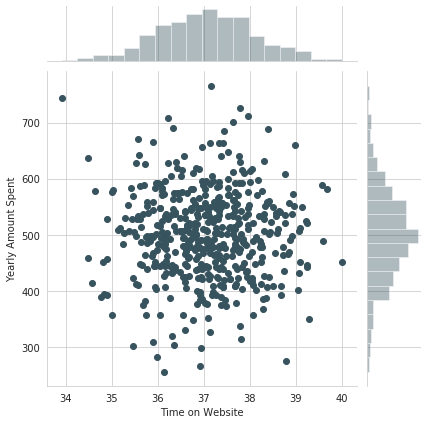

In [7]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

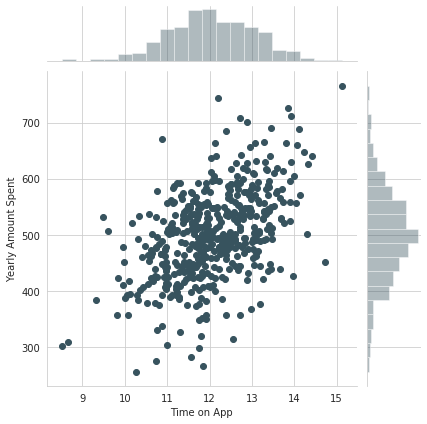

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

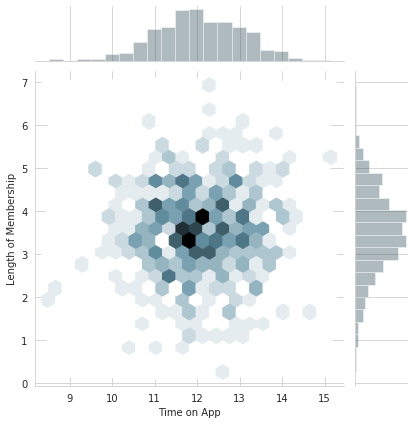

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

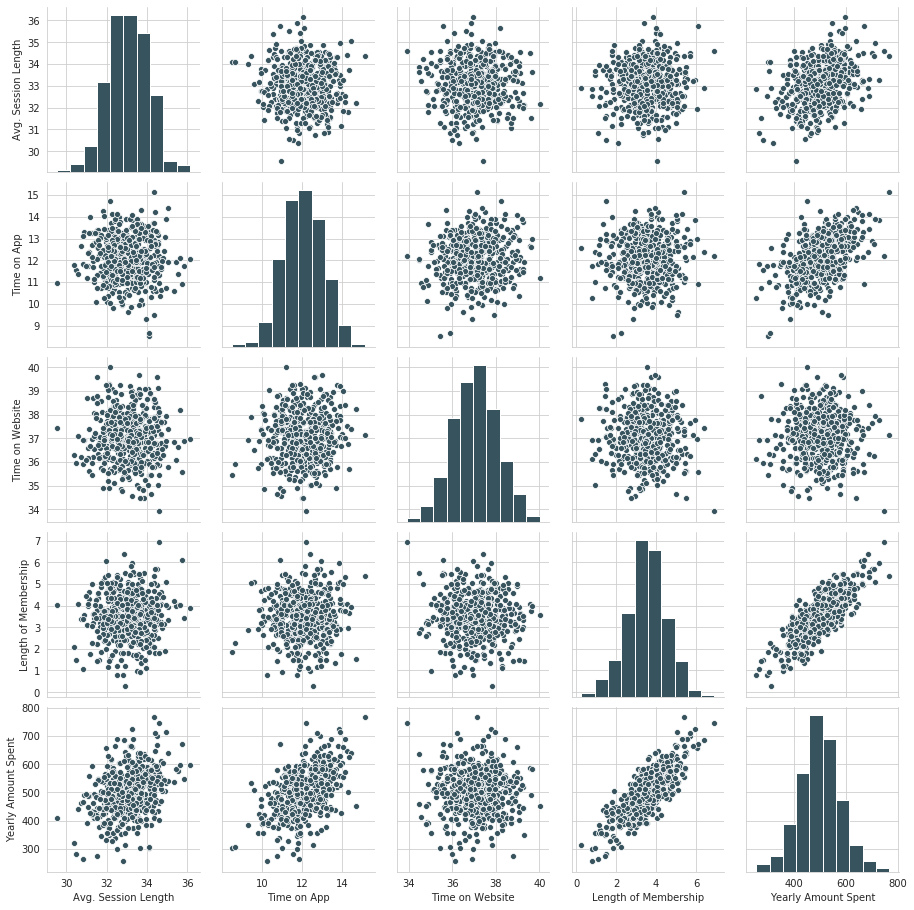

In [10]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [11]:
# Length of Membership 

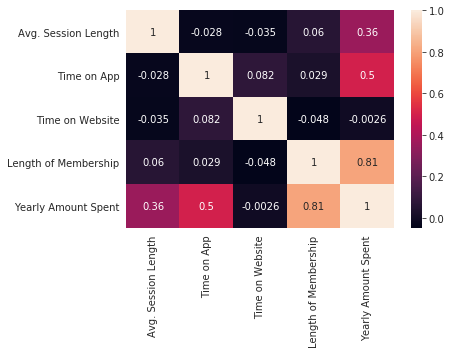

In [12]:
corr=customers.iloc[:,3:].corr() 
columns=corr.columns 
sns.heatmap(corr,annot=True)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

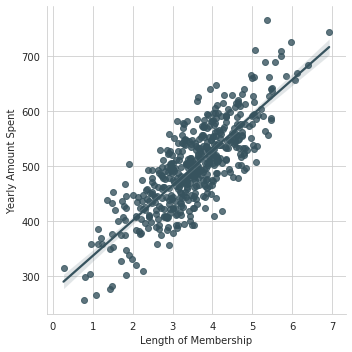

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [14]:
y = customers['Yearly Amount Spent'].values

In [15]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [18]:
#Multiple-Linear_Regression Approach

In [19]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [20]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [22]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.88815047 38.87046474  0.47066154 61.78369022]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [23]:
y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[438.46 449.07]
 [489.66 482.6 ]
 [370.07 374.27]
 [513.86 513.15]
 [495.7  502.77]
 [450.89 461.78]
 [458.01 466.42]
 [336.67 327.38]
 [528.52 528.22]
 [663.28 657.02]
 [559.42 571.47]
 [526.02 523.63]
 [552.21 546.56]
 [457.68 467.43]
 [450.16 439.89]
 [431.65 445.06]
 [563.59 553.99]
 [408.35 403.77]
 [599.62 595.8 ]
 [486.85 490.74]
 [716.65 712.4 ]
 [496.79 502.09]
 [411.5  398.16]
 [556.55 570.45]
 [551.85 549.86]
 [398.18 392.99]
 [421.31 419.94]
 [395.15 407.66]
 [548.53 521.14]
 [463.49 463.75]
 [558.44 556.3 ]
 [505.53 506.55]
 [505.88 514.34]
 [463.95 476.77]
 [425.98 418.6 ]
 [401.07 403.82]
 [503.6  506.13]
 [430.34 436.72]
 [569.63 558.95]
 [421.89 421.33]
 [487.27 478.26]
 [602.37 593.92]
 [616.45 632.12]
 [589.39 591.44]
 [449.73 444.29]
 [379.93 392.2 ]
 [558.17 558.43]
 [462.72 447.19]
 [502.17 475.73]
 [401.43 420.74]
 [523.85 527.78]
 [416.8  421.97]
 [576.87 576.03]
 [478.5  460.06]
 [457.25 452.63]
 [397.68 408.64]
 [564.87 557.25]
 [305.13 298.76]
 [562.63 555.0

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

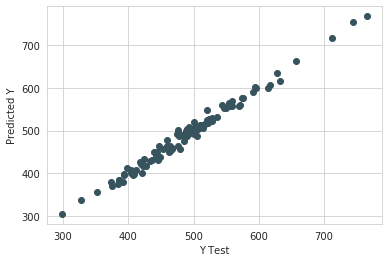

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [25]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

MAE: 7.645674798915295
MSE: 92.89010304498548
RMSE: 9.637951185028149


0.9861924261981547

In [26]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = lm, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Score: {:.2f} %".format(r2_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores.std()*100))

R2_Score: 98.28 %
Standard Deviation: 0.23 %


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

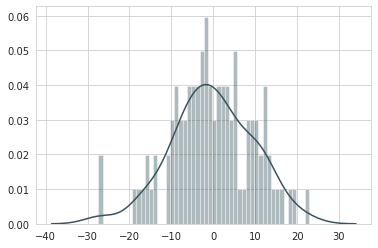

In [27]:
sns.distplot((y_test-y_pred),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [28]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!


In [29]:
#Polynomial Regression Approach

In [30]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor1 = LinearRegression()
regressor1.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred1 = regressor1.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[442.12 449.07]
 [488.87 482.6 ]
 [363.88 374.27]
 [514.45 513.15]
 [497.08 502.77]
 [444.88 461.78]
 [460.49 466.42]
 [337.17 327.38]
 [528.86 528.22]
 [680.78 657.02]
 [557.72 571.47]
 [524.57 523.63]
 [549.74 546.56]
 [449.19 467.43]
 [454.37 439.89]
 [435.73 445.06]
 [564.66 553.99]
 [399.45 403.77]
 [599.25 595.8 ]
 [486.46 490.74]
 [697.5  712.4 ]
 [496.16 502.09]
 [411.06 398.16]
 [555.96 570.45]
 [550.87 549.86]
 [399.06 392.99]
 [425.1  419.94]
 [387.61 407.66]
 [550.94 521.14]
 [463.34 463.75]
 [559.91 556.3 ]
 [503.05 506.55]
 [506.08 514.34]
 [463.51 476.77]
 [428.65 418.6 ]
 [404.54 403.82]
 [501.8  506.13]
 [426.13 436.72]
 [568.54 558.95]
 [422.71 421.33]
 [487.99 478.26]
 [600.38 593.92]
 [610.55 632.12]
 [595.84 591.44]
 [446.61 444.29]
 [377.72 392.2 ]
 [563.39 558.43]
 [463.74 447.19]
 [500.37 475.73]
 [401.82 420.74]
 [527.05 527.78]
 [416.83 421.97]
 [573.33 576.03]
 [481.34 460.06]
 [454.39 452.63]
 [462.66 408.64]
 [573.6  557.25]
 [310.52 298.76]
 [565.71 555.0

Text(0, 0.5, 'Predicted Y')

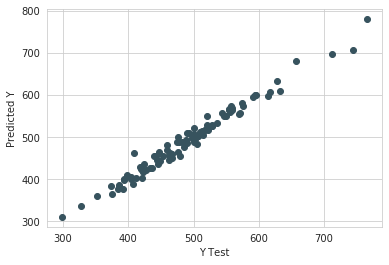

In [33]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

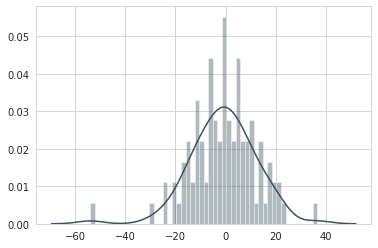

In [34]:
sns.distplot((y_test-y_pred1),bins=50);

In [38]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

MAE: 9.821412017434954
MSE: 168.1146222773757
RMSE: 12.965902293221852


0.9750107387313366

In [39]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores1 = cross_val_score(estimator = regressor1, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores1.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores1.std()*100))

R2_Scores: 98.28 %
Standard Deviation: 0.23 %


In [40]:
#Decision-Tree Regression Approach

In [41]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [43]:
y_pred2 = regressor2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[407.7  449.07]
 [469.31 482.6 ]
 [282.47 374.27]
 [514.09 513.15]
 [507.44 502.77]
 [472.99 461.78]
 [484.52 466.42]
 [282.47 327.38]
 [483.54 528.22]
 [725.58 657.02]
 [553.6  571.47]
 [537.77 523.63]
 [543.13 546.56]
 [432.47 467.43]
 [470.45 439.89]
 [444.58 445.06]
 [528.31 553.99]
 [407.54 403.77]
 [529.23 595.8 ]
 [469.31 490.74]
 [666.13 712.4 ]
 [518.79 502.09]
 [422.43 398.16]
 [561.87 570.45]
 [521.88 549.86]
 [392.29 392.99]
 [436.58 419.94]
 [357.78 407.66]
 [547.37 521.14]
 [446.42 463.75]
 [571.22 556.3 ]
 [492.95 506.55]
 [552.94 514.34]
 [483.16 476.77]
 [479.73 418.6 ]
 [408.96 403.82]
 [538.94 506.13]
 [436.28 436.72]
 [560.56 558.95]
 [470.45 421.33]
 [521.2  478.26]
 [584.11 593.92]
 [608.27 632.12]
 [507.21 591.44]
 [424.73 444.29]
 [390.1  392.2 ]
 [529.06 558.43]
 [436.58 447.19]
 [537.77 475.73]
 [434.02 420.74]
 [469.38 527.78]
 [422.37 421.97]
 [591.78 576.03]
 [479.25 460.06]
 [456.47 452.63]
 [473.36 408.64]
 [616.66 557.25]
 [357.86 298.76]
 [592.69 555.0

Text(0, 0.5, 'Predicted Y')

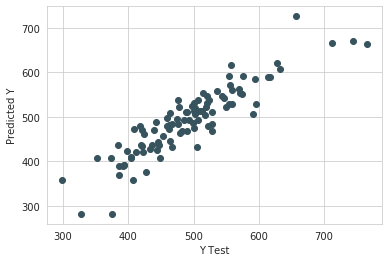

In [44]:
plt.scatter(y_test,y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

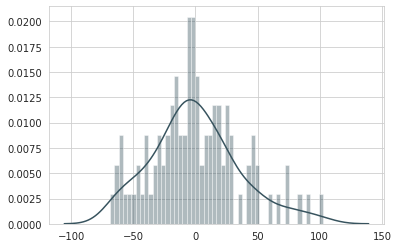

In [45]:
sns.distplot((y_test-y_pred2),bins=50);

In [46]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

MAE: 26.9982836019345
MSE: 1241.1859223935928
RMSE: 35.23046866553996


0.8155049282595656

In [47]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [2, 6, 8,10,12,14], 
              "max_features": randint(1, 9),
              "min_samples_split": randint(2,40),
              "min_samples_leaf": randint(1, 9),
              "max_leaf_nodes": randint(1, 100),
              "criterion": ["mse", "mae"]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(regressor2,param_dist, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'mse', 'max_depth': 14, 'max_features': 3, 'max_leaf_nodes': 56, 'min_samples_leaf': 2, 'min_samples_split': 17}
Best score is 0.8010854174469488


In [48]:
#Hyperparameter tuning with GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2,4,10, 20,24,26,28,30, 40],
              "max_features": [4],
              "max_depth": [10,12,14],
              "min_samples_leaf": [2,4,6,8,10,20, 40],
              "max_leaf_nodes": [1,5, 20, 100],
              }
grid_search = GridSearchCV(estimator = regressor2,
                           param_grid = param_grid,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_r2_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best R2_score: {:.2f} %".format(best_r2_score*100))
print("Best Parameters:", best_parameters)

Best R2_score: 85.47 %
Best Parameters: {'criterion': 'mae', 'max_depth': 12, 'max_features': 4, 'max_leaf_nodes': 100, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [50]:
#Updated Decision Tree Regressor with best Hyperparameters Selected
regressor2_new = DecisionTreeRegressor(random_state = 0,criterion='mae',max_depth=12,max_leaf_nodes=100,min_samples_leaf=2,min_samples_split=2)
regressor2_new.fit(X_train, y_train)
y_pred2_new = regressor2_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2_new.reshape(len(y_pred2_new),1), y_test.reshape(len(y_test),1)),1))

[[444.58 449.07]
 [507.57 482.6 ]
 [404.99 374.27]
 [494.64 513.15]
 [510.35 502.77]
 [476.92 461.78]
 [435.56 466.42]
 [404.99 327.38]
 [537.83 528.22]
 [593.03 657.02]
 [545.95 571.47]
 [529.21 523.63]
 [519.73 546.56]
 [477.01 467.43]
 [444.58 439.89]
 [444.58 445.06]
 [581.8  553.99]
 [413.33 403.77]
 [583.08 595.8 ]
 [507.57 490.74]
 [660.43 712.4 ]
 [529.21 502.09]
 [432.33 398.16]
 [573.63 570.45]
 [520.56 549.86]
 [396.66 392.99]
 [444.58 419.94]
 [381.55 407.66]
 [552.94 521.14]
 [492.95 463.75]
 [564.41 556.3 ]
 [492.95 506.55]
 [510.35 514.34]
 [483.16 476.77]
 [486.46 418.6 ]
 [397.42 403.82]
 [479.23 506.13]
 [432.33 436.72]
 [561.32 558.95]
 [444.58 421.33]
 [475.6  478.26]
 [581.8  593.92]
 [660.43 632.12]
 [593.12 591.44]
 [432.33 444.29]
 [390.1  392.2 ]
 [578.24 558.43]
 [477.01 447.19]
 [492.05 475.73]
 [408.62 420.74]
 [493.18 527.78]
 [413.33 421.97]
 [545.95 576.03]
 [479.23 460.06]
 [432.33 452.63]
 [475.6  408.64]
 [495.18 557.25]
 [275.92 298.76]
 [552.94 555.0

In [51]:
# calculate these metrics by hand #Updated Decision Tree Regressor with best Hyperparameters Selected!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred2_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_new)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2_new)

MAE: 22.302801428455044
MSE: 892.9177245951145
RMSE: 29.881728942534675


0.8672729712082243

In [52]:
#K-Cross Validation #Updated Decision Tree Regressor with best Hyperparameters Selected
from sklearn.model_selection import cross_val_score
r2_scores2 = cross_val_score(estimator = regressor2_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores2.std()*100))

R2_Scores: 85.47 %
Standard Deviation: 4.47 %


In [53]:
#Random_Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
y_pred3 = regressor3.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[449.54 449.07]
 [484.41 482.6 ]
 [361.12 374.27]
 [512.09 513.15]
 [507.99 502.77]
 [474.93 461.78]
 [466.41 466.42]
 [357.   327.38]
 [517.72 528.22]
 [678.43 657.02]
 [550.45 571.47]
 [525.7  523.63]
 [515.61 546.56]
 [441.86 467.43]
 [464.63 439.89]
 [419.47 445.06]
 [554.54 553.99]
 [411.63 403.77]
 [550.33 595.8 ]
 [486.2  490.74]
 [659.27 712.4 ]
 [508.33 502.09]
 [426.28 398.16]
 [554.63 570.45]
 [545.26 549.86]
 [397.98 392.99]
 [426.59 419.94]
 [394.42 407.66]
 [564.95 521.14]
 [469.49 463.75]
 [558.14 556.3 ]
 [507.52 506.55]
 [517.65 514.34]
 [466.54 476.77]
 [484.75 418.6 ]
 [401.8  403.82]
 [505.4  506.13]
 [434.02 436.72]
 [569.11 558.95]
 [438.15 421.33]
 [511.96 478.26]
 [583.66 593.92]
 [607.03 632.12]
 [574.82 591.44]
 [433.64 444.29]
 [388.47 392.2 ]
 [545.51 558.43]
 [430.06 447.19]
 [505.9  475.73]
 [417.88 420.74]
 [510.93 527.78]
 [417.3  421.97]
 [567.96 576.03]
 [482.22 460.06]
 [447.61 452.63]
 [484.44 408.64]
 [554.37 557.25]
 [322.34 298.76]
 [567.07 555.0

Text(0, 0.5, 'Predicted Y')

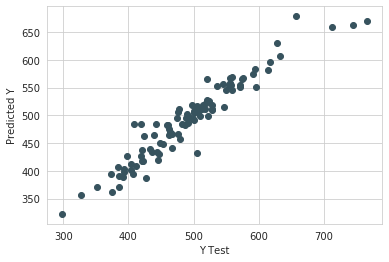

In [56]:
plt.scatter(y_test,y_pred3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [57]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

MAE: 17.13209391931522
MSE: 628.6684750922944
RMSE: 25.073262154978845


0.9065520859361456

In [58]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist1 = {"n_estimators": [10,20,30,50],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["mse", "mae"],
            "max_depth": [2, 6, 8,10,12]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv1 = RandomizedSearchCV(regressor3,param_dist1, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv1.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv1.best_params_)) 
print("Best score is {}".format(tree_cv1.best_score_)) 

Tuned Random Forest Parameters: {'n_estimators': 30, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'mse'}
Best score is 0.9222916477914291


In [59]:
# Hyperparameter Tuning using GridSearch

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {"n_estimators": [20,30,50],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10],
            "criterion": ["mse", "mae"],
            "max_depth": [8,10,12]  
            }

grid_search1 = GridSearchCV(estimator = regressor3,
                           param_grid = param_grid1,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search1.fit(X_train, y_train)
best_r2_score1 = grid_search1.best_score_
best_parameters1 = grid_search1.best_params_
print("Best R2_score: {:.2f} %".format(best_r2_score1*100))
print("Best Parameters:", best_parameters1)


Best R2_score: 93.30 %
Best Parameters: {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 50}


In [61]:
#Updated Random Forest Regressor with best Hyperparameters Selected
regressor3_new = RandomForestRegressor(n_estimators = 50, random_state = 0,criterion='mse',max_depth=10,max_features='auto',min_samples_split=2)
regressor3_new.fit(X_train, y_train)
y_pred3_new = regressor3_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3_new.reshape(len(y_pred3_new),1), y_test.reshape(len(y_test),1)),1))



[[449.29 449.07]
 [484.24 482.6 ]
 [361.09 374.27]
 [512.34 513.15]
 [509.99 502.77]
 [473.7  461.78]
 [465.08 466.42]
 [356.91 327.38]
 [516.16 528.22]
 [678.15 657.02]
 [549.06 571.47]
 [523.94 523.63]
 [514.05 546.56]
 [441.82 467.43]
 [469.32 439.89]
 [419.92 445.06]
 [558.15 553.99]
 [411.93 403.77]
 [552.15 595.8 ]
 [486.82 490.74]
 [656.96 712.4 ]
 [506.28 502.09]
 [424.98 398.16]
 [553.63 570.45]
 [547.57 549.86]
 [399.99 392.99]
 [427.   419.94]
 [394.87 407.66]
 [565.84 521.14]
 [471.3  463.75]
 [556.6  556.3 ]
 [507.23 506.55]
 [516.05 514.34]
 [466.58 476.77]
 [485.64 418.6 ]
 [401.75 403.82]
 [501.97 506.13]
 [433.98 436.72]
 [567.47 558.95]
 [439.49 421.33]
 [513.17 478.26]
 [584.   593.92]
 [607.9  632.12]
 [575.64 591.44]
 [434.13 444.29]
 [388.52 392.2 ]
 [544.54 558.43]
 [431.12 447.19]
 [507.29 475.73]
 [417.43 420.74]
 [511.33 527.78]
 [418.47 421.97]
 [569.01 576.03]
 [482.19 460.06]
 [451.13 452.63]
 [485.09 408.64]
 [558.53 557.25]
 [322.34 298.76]
 [567.02 555.0

In [62]:
# calculate these metrics by hand #Updated Random Forest Regressor with best Hyperparameters Selected!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred3_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3_new)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3_new)

MAE: 17.312416565112212
MSE: 645.8748273882037
RMSE: 25.41406750971209


0.9039944616963353

In [63]:
#K-Cross Validation #Updated Random Forest Regressor with best Hyperparameters Selected
from sklearn.model_selection import cross_val_score
r2_scores3 = cross_val_score(estimator = regressor3_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores3.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores3.std()*100))


R2_Scores: 93.31 %
Standard Deviation: 1.51 %


In [64]:
#Support_Vector_Kernel Regression

In [65]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
y = y.reshape(len(y),1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


In [67]:
X_train = sc_X.fit_transform(X_train)

In [68]:
y_train = y_train.reshape(len(y_train),1)
y_train

array([[378.33],
       [478.6 ],
       [595.82],
       [492.56],
       [521.57],
       [444.05],
       [422.43],
       [501.93],
       [282.47],
       [503.98],
       [582.49],
       [549.9 ],
       [433.05],
       [570.2 ],
       [392.29],
       [486.95],
       [478.95],
       [463.59],
       [496.55],
       [524.64],
       [556.19],
       [416.36],
       [407.8 ],
       [594.27],
       [493.18],
       [538.77],
       [547.37],
       [411.19],
       [503.18],
       [589.03],
       [515.5 ],
       [436.28],
       [510.16],
       [483.67],
       [451.73],
       [510.4 ],
       [537.92],
       [534.77],
       [478.18],
       [425.75],
       [434.02],
       [384.63],
       [578.24],
       [619.9 ],
       [597.74],
       [599.41],
       [564.79],
       [533.04],
       [409.07],
       [637.1 ],
       [472.99],
       [583.98],
       [482.35],
       [627.6 ],
       [514.24],
       [436.52],
       [408.62],
       [534.71],
       [410.6 

In [69]:
y_train = sc_y.fit_transform(y_train)

In [70]:
from sklearn.svm import SVR
regressor4 = SVR(kernel = 'linear')
regressor4.fit(X_train, y_train)

/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
y_pred4 = sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[438.6  449.07]
 [489.81 482.6 ]
 [370.31 374.27]
 [513.87 513.15]
 [495.82 502.77]
 [450.64 461.78]
 [458.36 466.42]
 [336.74 327.38]
 [529.01 528.22]
 [663.21 657.02]
 [559.55 571.47]
 [526.15 523.63]
 [552.98 546.56]
 [458.22 467.43]
 [450.18 439.89]
 [431.88 445.06]
 [564.03 553.99]
 [408.62 403.77]
 [600.44 595.8 ]
 [487.02 490.74]
 [717.25 712.4 ]
 [497.01 502.09]
 [411.7  398.16]
 [556.79 570.45]
 [552.36 549.86]
 [398.17 392.99]
 [421.67 419.94]
 [395.33 407.66]
 [548.87 521.14]
 [463.47 463.75]
 [558.44 556.3 ]
 [505.6  506.55]
 [506.06 514.34]
 [464.09 476.77]
 [425.82 418.6 ]
 [401.43 403.82]
 [504.16 506.13]
 [430.75 436.72]
 [569.91 558.95]
 [421.8  421.33]
 [487.48 478.26]
 [602.9  593.92]
 [616.65 632.12]
 [589.66 591.44]
 [450.05 444.29]
 [379.91 392.2 ]
 [558.68 558.43]
 [463.13 447.19]
 [502.09 475.73]
 [401.53 420.74]
 [524.3  527.78]
 [417.08 421.97]
 [576.92 576.03]
 [478.91 460.06]
 [457.74 452.63]
 [397.14 408.64]
 [564.69 557.25]
 [305.3  298.76]
 [563.15 555.0

Text(0, 0.5, 'Predicted Y')

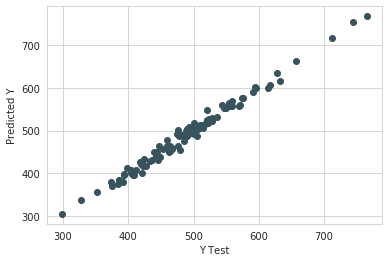

In [72]:
plt.scatter(y_test,y_pred4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [73]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

MAE: 7.684301593806611
MSE: 93.41165186472095
RMSE: 9.664970349914217


0.9861149009981205

In [74]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(regressor4,param_dist2, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVR Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVR Parameters: {'kernel': 'linear', 'epsilon': 0.1, 'degree': 2, 'C': 1}
Best score is 0.9827810850712135


/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'epsilon':[0.01,0.1,1,10],'degree':[1,2,3,4]}]
grid_search2 = GridSearchCV(estimator = regressor4,
                           param_grid = parameters2,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search2.fit(X_train, y_train)
best_r21 = grid_search2.best_score_
best_parameters2 = grid_search2.best_params_
print("Best r2_score: {:.2f} %".format(best_r21*100))
print("Best Parameters:", best_parameters2)

Best r2_score: 98.28 %
Best Parameters: {'C': 0.5, 'degree': 1, 'epsilon': 0.1, 'kernel': 'linear'}


/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
#Updated SVR with hyperparameter tuning
regressor4_new = SVR(kernel = 'linear',C=0.5,degree=1,epsilon=0.1)
regressor4_new.fit(X_train, y_train)
y_pred4_new = sc_y.inverse_transform(regressor4.predict(sc_X.transform(X_test)))
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred4_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4_new)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4_new)

MAE: 7.684301593806611
MSE: 93.41165186472095
RMSE: 9.664970349914217


/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9861149009981205

In [77]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores4 = cross_val_score(estimator = regressor4_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores4.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores4.std()*100))


/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

R2_Scores: 98.28 %
Standard Deviation: 0.23 %


/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [78]:
#XGBoost Regression

In [79]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
from xgboost import XGBRegressor
regressor5 = XGBRegressor()
regressor5.fit(X_train,y_train)

[19:27:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [81]:
y_pred5 = regressor5.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.reshape(len(y_test),1)),1))

[[450.88 449.07]
 [482.02 482.6 ]
 [378.95 374.27]
 [523.04 513.15]
 [506.15 502.77]
 [472.99 461.78]
 [463.06 466.42]
 [345.17 327.38]
 [523.15 528.22]
 [656.81 657.02]
 [567.58 571.47]
 [521.2  523.63]
 [526.84 546.56]
 [460.51 467.43]
 [443.75 439.89]
 [433.86 445.06]
 [554.71 553.99]
 [409.3  403.77]
 [566.02 595.8 ]
 [487.9  490.74]
 [676.27 712.4 ]
 [507.43 502.09]
 [418.18 398.16]
 [554.84 570.45]
 [557.28 549.86]
 [399.25 392.99]
 [441.99 419.94]
 [392.06 407.66]
 [551.89 521.14]
 [464.48 463.75]
 [525.63 556.3 ]
 [505.44 506.55]
 [498.4  514.34]
 [462.96 476.77]
 [471.39 418.6 ]
 [394.9  403.82]
 [504.17 506.13]
 [427.59 436.72]
 [561.71 558.95]
 [418.54 421.33]
 [511.29 478.26]
 [592.72 593.92]
 [606.02 632.12]
 [579.88 591.44]
 [438.59 444.29]
 [391.53 392.2 ]
 [542.36 558.43]
 [452.41 447.19]
 [505.37 475.73]
 [410.25 420.74]
 [514.69 527.78]
 [409.98 421.97]
 [568.34 576.03]
 [477.85 460.06]
 [458.9  452.63]
 [468.6  408.64]
 [524.78 557.25]
 [307.92 298.76]
 [568.34 555.0

In [82]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred5)

MAE: 13.63411925070262
MSE: 359.50240489463357
RMSE: 18.9605486443466


0.9465620574764614

In [83]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist6 = {"n_estimators": [10,30,50,100,200],"min_child_weight":[1,2,3,4,5],
               "gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6],
            "max_depth": [3,4,5,6,7,8,9,10],
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              "learning_rate":[0.01,0.1,1]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv6 = RandomizedSearchCV(regressor5,param_dist6, cv = 10,scoring = "r2",n_jobs=-1) 
  
tree_cv6.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned XGboost Parameters: {}".format(tree_cv6.best_params_)) 
print("Best score is {}".format(tree_cv6.best_score_)) 

[19:27:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tuned XGboost Parameters: {'subsample': 0.7, 'reg_alpha': 1e-05, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Best score is 0.9298204193546997


In [84]:
#Updated XGBoost Regressor with best Hyperparameters Selected
regressor5_new = XGBRegressor(n_estimators = 100, random_state = 0,max_depth=4,subsample=0.8,reg_alpha=0.1,min_child_weight=5,gamma=0.3,
                             colsample_bytree=0.9)
regressor5_new.fit(X_train, y_train)
y_pred5_new = regressor5_new.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred5_new.reshape(len(y_pred5_new),1), y_test.reshape(len(y_test),1)),1))
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred5_new))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5_new))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5_new)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred5_new)

[19:27:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[[443.71 449.07]
 [484.85 482.6 ]
 [385.05 374.27]
 [521.34 513.15]
 [498.85 502.77]
 [462.75 461.78]
 [456.39 466.42]
 [353.89 327.38]
 [524.02 528.22]
 [663.87 657.02]
 [556.11 571.47]
 [519.52 523.63]
 [537.69 546.56]
 [452.89 467.43]
 [439.53 439.89]
 [431.65 445.06]
 [560.01 553.99]
 [410.   403.77]
 [571.89 595.8 ]
 [482.04 490.74]
 [669.66 712.4 ]
 [508.85 502.09]
 [419.36 398.16]
 [554.36 570.45]
 [563.27 549.86]
 [397.89 392.99]
 [437.13 419.94]
 [387.94 407.66]
 [551.98 521.14]
 [461.62 463.75]
 [547.76 556.3 ]
 [501.7  506.55]
 [505.   514.34]
 [464.86 476.77]
 [468.16 418.6 ]
 [404.3  403.82]
 [494.13 506.13]
 [432.1  436.72]
 [568.17 558.95]
 [414.82 421.33]
 [491.68 478.26]
 [593.84 593.92]
 [608.44 632.12]
 [583.31 591.44]
 [446.83 444.29]
 [395.91 392.2 ]
 [543.2  558.43]
 [446.63 447.19]
 [493.73 475.73]
 [405.67 420.74]
 [517.82 527.78]
 [417.04 421.97]


0.9552585038437942

In [85]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores4 = cross_val_score(estimator = regressor5_new, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores4.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores4.std()*100))


[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [86]:
#CatBoost Regression

In [87]:
from catboost import CatBoostRegressor
regressor6 = CatBoostRegressor()
regressor6.fit(X_train,y_train)

Learning rate set to 0.033156
0:	learn: 76.8368300	total: 72.6ms	remaining: 1m 12s
1:	learn: 75.3254496	total: 73.9ms	remaining: 36.9s
2:	learn: 73.9470815	total: 75.4ms	remaining: 25.1s
3:	learn: 72.3334106	total: 76.8ms	remaining: 19.1s
4:	learn: 70.9867067	total: 78.3ms	remaining: 15.6s
5:	learn: 69.5420478	total: 79.6ms	remaining: 13.2s
6:	learn: 68.2103316	total: 80.8ms	remaining: 11.5s
7:	learn: 66.9492271	total: 82.4ms	remaining: 10.2s
8:	learn: 65.7467161	total: 83.8ms	remaining: 9.23s
9:	learn: 64.4294680	total: 85.8ms	remaining: 8.49s
10:	learn: 63.1529702	total: 87.9ms	remaining: 7.9s
11:	learn: 61.8575290	total: 90.2ms	remaining: 7.43s
12:	learn: 60.8059050	total: 91.8ms	remaining: 6.97s
13:	learn: 59.6573068	total: 93.3ms	remaining: 6.57s
14:	learn: 58.5667411	total: 95.2ms	remaining: 6.25s
15:	learn: 57.4539789	total: 96.6ms	remaining: 5.94s
16:	learn: 56.3587811	total: 97.9ms	remaining: 5.66s
17:	learn: 55.4595430	total: 99.2ms	remaining: 5.41s
18:	learn: 54.3810920	tota

189:	learn: 10.4618581	total: 513ms	remaining: 2.19s
190:	learn: 10.4341640	total: 515ms	remaining: 2.18s
191:	learn: 10.4040778	total: 517ms	remaining: 2.18s
192:	learn: 10.3748971	total: 520ms	remaining: 2.17s
193:	learn: 10.3500276	total: 522ms	remaining: 2.17s
194:	learn: 10.3172268	total: 524ms	remaining: 2.16s
195:	learn: 10.2870030	total: 526ms	remaining: 2.16s
196:	learn: 10.2603218	total: 531ms	remaining: 2.16s
197:	learn: 10.2291480	total: 533ms	remaining: 2.16s
198:	learn: 10.1929048	total: 535ms	remaining: 2.15s
199:	learn: 10.1624483	total: 537ms	remaining: 2.15s
200:	learn: 10.1383363	total: 540ms	remaining: 2.15s
201:	learn: 10.1155945	total: 542ms	remaining: 2.14s
202:	learn: 10.0906259	total: 544ms	remaining: 2.13s
203:	learn: 10.0559882	total: 546ms	remaining: 2.13s
204:	learn: 10.0277540	total: 547ms	remaining: 2.12s
205:	learn: 10.0060606	total: 549ms	remaining: 2.12s
206:	learn: 9.9792145	total: 550ms	remaining: 2.11s
207:	learn: 9.9525153	total: 552ms	remaining: 2

410:	learn: 7.7248391	total: 879ms	remaining: 1.26s
411:	learn: 7.7177831	total: 881ms	remaining: 1.26s
412:	learn: 7.7063792	total: 883ms	remaining: 1.25s
413:	learn: 7.6889631	total: 886ms	remaining: 1.25s
414:	learn: 7.6795032	total: 888ms	remaining: 1.25s
415:	learn: 7.6786571	total: 891ms	remaining: 1.25s
416:	learn: 7.6731322	total: 894ms	remaining: 1.25s
417:	learn: 7.6694293	total: 896ms	remaining: 1.25s
418:	learn: 7.6612383	total: 899ms	remaining: 1.25s
419:	learn: 7.6474691	total: 901ms	remaining: 1.24s
420:	learn: 7.6355584	total: 905ms	remaining: 1.24s
421:	learn: 7.6346714	total: 909ms	remaining: 1.24s
422:	learn: 7.6163707	total: 912ms	remaining: 1.24s
423:	learn: 7.6066701	total: 914ms	remaining: 1.24s
424:	learn: 7.6028041	total: 916ms	remaining: 1.24s
425:	learn: 7.5914384	total: 919ms	remaining: 1.24s
426:	learn: 7.5862399	total: 921ms	remaining: 1.24s
427:	learn: 7.5689955	total: 923ms	remaining: 1.23s
428:	learn: 7.5614979	total: 932ms	remaining: 1.24s
429:	learn: 

613:	learn: 6.2211228	total: 1.25s	remaining: 785ms
614:	learn: 6.2157106	total: 1.25s	remaining: 785ms
615:	learn: 6.2074766	total: 1.26s	remaining: 783ms
616:	learn: 6.2071748	total: 1.26s	remaining: 782ms
617:	learn: 6.1967696	total: 1.26s	remaining: 780ms
618:	learn: 6.1893444	total: 1.26s	remaining: 778ms
619:	learn: 6.1829861	total: 1.27s	remaining: 776ms
620:	learn: 6.1677045	total: 1.27s	remaining: 774ms
621:	learn: 6.1608380	total: 1.27s	remaining: 773ms
622:	learn: 6.1556755	total: 1.27s	remaining: 770ms
623:	learn: 6.1553434	total: 1.27s	remaining: 768ms
624:	learn: 6.1486807	total: 1.28s	remaining: 766ms
625:	learn: 6.1387111	total: 1.28s	remaining: 764ms
626:	learn: 6.1286643	total: 1.29s	remaining: 765ms
627:	learn: 6.1201433	total: 1.29s	remaining: 763ms
628:	learn: 6.1079621	total: 1.29s	remaining: 762ms
629:	learn: 6.1016252	total: 1.29s	remaining: 760ms
630:	learn: 6.0848752	total: 1.29s	remaining: 758ms
631:	learn: 6.0795142	total: 1.3s	remaining: 755ms
632:	learn: 6

796:	learn: 5.1686621	total: 1.62s	remaining: 413ms
797:	learn: 5.1684925	total: 1.62s	remaining: 411ms
798:	learn: 5.1643344	total: 1.63s	remaining: 409ms
799:	learn: 5.1613466	total: 1.63s	remaining: 407ms
800:	learn: 5.1526543	total: 1.63s	remaining: 405ms
801:	learn: 5.1483180	total: 1.63s	remaining: 403ms
802:	learn: 5.1423244	total: 1.63s	remaining: 401ms
803:	learn: 5.1374067	total: 1.64s	remaining: 399ms
804:	learn: 5.1371672	total: 1.64s	remaining: 397ms
805:	learn: 5.1369629	total: 1.64s	remaining: 395ms
806:	learn: 5.1336310	total: 1.64s	remaining: 393ms
807:	learn: 5.1288366	total: 1.65s	remaining: 391ms
808:	learn: 5.1220193	total: 1.65s	remaining: 389ms
809:	learn: 5.1190761	total: 1.66s	remaining: 389ms
810:	learn: 5.1172683	total: 1.66s	remaining: 387ms
811:	learn: 5.1075501	total: 1.67s	remaining: 386ms
812:	learn: 5.1028324	total: 1.67s	remaining: 383ms
813:	learn: 5.0993245	total: 1.67s	remaining: 381ms
814:	learn: 5.0960238	total: 1.67s	remaining: 379ms
815:	learn: 

994:	learn: 4.3244912	total: 1.99s	remaining: 10ms
995:	learn: 4.3232994	total: 2s	remaining: 8.01ms
996:	learn: 4.3177551	total: 2s	remaining: 6.01ms
997:	learn: 4.3115381	total: 2s	remaining: 4ms
998:	learn: 4.3073500	total: 2s	remaining: 2ms
999:	learn: 4.3030232	total: 2s	remaining: 0us


In [88]:
y_pred6 = regressor6.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

[[440.58 449.07]
 [488.32 482.6 ]
 [361.92 374.27]
 [512.49 513.15]
 [496.06 502.77]
 [457.02 461.78]
 [454.16 466.42]
 [339.67 327.38]
 [531.02 528.22]
 [645.88 657.02]
 [555.71 571.47]
 [524.3  523.63]
 [534.84 546.56]
 [445.57 467.43]
 [455.71 439.89]
 [438.51 445.06]
 [561.85 553.99]
 [402.1  403.77]
 [577.33 595.8 ]
 [484.27 490.74]
 [668.18 712.4 ]
 [496.85 502.09]
 [410.28 398.16]
 [556.95 570.45]
 [547.52 549.86]
 [398.99 392.99]
 [422.34 419.94]
 [388.17 407.66]
 [558.26 521.14]
 [463.89 463.75]
 [547.53 556.3 ]
 [508.77 506.55]
 [504.1  514.34]
 [463.22 476.77]
 [456.43 418.6 ]
 [406.97 403.82]
 [503.89 506.13]
 [427.03 436.72]
 [568.2  558.95]
 [417.7  421.33]
 [492.55 478.26]
 [596.05 593.92]
 [616.44 632.12]
 [585.26 591.44]
 [445.36 444.29]
 [379.93 392.2 ]
 [555.23 558.43]
 [451.57 447.19]
 [500.59 475.73]
 [403.47 420.74]
 [526.44 527.78]
 [415.45 421.97]
 [578.53 576.03]
 [476.92 460.06]
 [452.25 452.63]
 [452.31 408.64]
 [548.78 557.25]
 [299.79 298.76]
 [571.44 555.0

In [89]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred6)

MAE: 11.80193070072924
MSE: 290.54804106706683
RMSE: 17.04546981068773


0.9568117227938454

In [90]:
#K-Cross Validation
from sklearn.model_selection import cross_val_score
r2_scores4 = cross_val_score(estimator = regressor6, X = X_train, y = y_train, scoring='r2',cv = 10)
print("R2_Scores: {:.2f} %".format(r2_scores4.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2_scores4.std()*100))


Learning rate set to 0.03254
0:	learn: 78.0267342	total: 1.17ms	remaining: 1.17s
1:	learn: 76.6577650	total: 2.48ms	remaining: 1.24s
2:	learn: 75.1359646	total: 3.72ms	remaining: 1.24s
3:	learn: 73.5213305	total: 4.95ms	remaining: 1.23s
4:	learn: 72.2276846	total: 6.32ms	remaining: 1.26s
5:	learn: 70.8478887	total: 8.24ms	remaining: 1.36s
6:	learn: 69.4864632	total: 9.53ms	remaining: 1.35s
7:	learn: 68.1163153	total: 10.8ms	remaining: 1.34s
8:	learn: 66.9029891	total: 12.3ms	remaining: 1.35s
9:	learn: 65.6160655	total: 13.5ms	remaining: 1.33s
10:	learn: 64.2974500	total: 14.6ms	remaining: 1.31s
11:	learn: 63.0157242	total: 16.5ms	remaining: 1.36s
12:	learn: 61.9179698	total: 17.8ms	remaining: 1.35s
13:	learn: 60.8473364	total: 21.3ms	remaining: 1.5s
14:	learn: 59.7128366	total: 24ms	remaining: 1.58s
15:	learn: 58.5308540	total: 26.3ms	remaining: 1.62s
16:	learn: 57.5124221	total: 28.2ms	remaining: 1.63s
17:	learn: 56.6203222	total: 35.6ms	remaining: 1.94s
18:	learn: 55.5345408	total: 3

181:	learn: 11.0733232	total: 557ms	remaining: 2.5s
182:	learn: 11.0287286	total: 561ms	remaining: 2.5s
183:	learn: 10.9843901	total: 563ms	remaining: 2.5s
184:	learn: 10.9410651	total: 565ms	remaining: 2.49s
185:	learn: 10.9094918	total: 567ms	remaining: 2.48s
186:	learn: 10.8674456	total: 569ms	remaining: 2.47s
187:	learn: 10.8209986	total: 571ms	remaining: 2.47s
188:	learn: 10.7863800	total: 585ms	remaining: 2.51s
189:	learn: 10.7474102	total: 587ms	remaining: 2.5s
190:	learn: 10.7043318	total: 590ms	remaining: 2.5s
191:	learn: 10.6689032	total: 592ms	remaining: 2.49s
192:	learn: 10.6266305	total: 594ms	remaining: 2.48s
193:	learn: 10.5904938	total: 596ms	remaining: 2.48s
194:	learn: 10.5537880	total: 600ms	remaining: 2.48s
195:	learn: 10.5145786	total: 605ms	remaining: 2.48s
196:	learn: 10.4716642	total: 607ms	remaining: 2.47s
197:	learn: 10.4341650	total: 608ms	remaining: 2.46s
198:	learn: 10.3971058	total: 611ms	remaining: 2.46s
199:	learn: 10.3573892	total: 615ms	remaining: 2.46

347:	learn: 7.9706801	total: 925ms	remaining: 1.73s
348:	learn: 7.9672212	total: 929ms	remaining: 1.73s
349:	learn: 7.9580963	total: 936ms	remaining: 1.74s
350:	learn: 7.9427221	total: 939ms	remaining: 1.74s
351:	learn: 7.9260952	total: 941ms	remaining: 1.73s
352:	learn: 7.9119509	total: 943ms	remaining: 1.73s
353:	learn: 7.9092244	total: 946ms	remaining: 1.73s
354:	learn: 7.8952234	total: 948ms	remaining: 1.72s
355:	learn: 7.8929646	total: 950ms	remaining: 1.72s
356:	learn: 7.8892024	total: 953ms	remaining: 1.72s
357:	learn: 7.8764615	total: 956ms	remaining: 1.71s
358:	learn: 7.8717945	total: 962ms	remaining: 1.72s
359:	learn: 7.8582165	total: 964ms	remaining: 1.71s
360:	learn: 7.8561706	total: 966ms	remaining: 1.71s
361:	learn: 7.8507851	total: 968ms	remaining: 1.71s
362:	learn: 7.8365515	total: 975ms	remaining: 1.71s
363:	learn: 7.8210738	total: 979ms	remaining: 1.71s
364:	learn: 7.8104238	total: 981ms	remaining: 1.71s
365:	learn: 7.7905552	total: 984ms	remaining: 1.7s
366:	learn: 7

510:	learn: 6.6717154	total: 1.57s	remaining: 1.5s
511:	learn: 6.6710909	total: 1.58s	remaining: 1.5s
512:	learn: 6.6583246	total: 1.58s	remaining: 1.5s
513:	learn: 6.6438064	total: 1.58s	remaining: 1.5s
514:	learn: 6.6430952	total: 1.58s	remaining: 1.49s
515:	learn: 6.6378415	total: 1.59s	remaining: 1.49s
516:	learn: 6.6304871	total: 1.59s	remaining: 1.49s
517:	learn: 6.6298241	total: 1.59s	remaining: 1.48s
518:	learn: 6.6157018	total: 1.59s	remaining: 1.48s
519:	learn: 6.6131734	total: 1.6s	remaining: 1.47s
520:	learn: 6.5993711	total: 1.6s	remaining: 1.47s
521:	learn: 6.5863661	total: 1.6s	remaining: 1.47s
522:	learn: 6.5806161	total: 1.61s	remaining: 1.47s
523:	learn: 6.5744196	total: 1.61s	remaining: 1.46s
524:	learn: 6.5736575	total: 1.61s	remaining: 1.46s
525:	learn: 6.5664497	total: 1.62s	remaining: 1.46s
526:	learn: 6.5561920	total: 1.62s	remaining: 1.45s
527:	learn: 6.5464475	total: 1.62s	remaining: 1.45s
528:	learn: 6.5366570	total: 1.62s	remaining: 1.45s
529:	learn: 6.52817

694:	learn: 5.4619565	total: 2.07s	remaining: 909ms
695:	learn: 5.4609959	total: 2.07s	remaining: 906ms
696:	learn: 5.4537148	total: 2.08s	remaining: 903ms
697:	learn: 5.4415772	total: 2.08s	remaining: 899ms
698:	learn: 5.4341398	total: 2.08s	remaining: 896ms
699:	learn: 5.4245156	total: 2.08s	remaining: 894ms
700:	learn: 5.4180991	total: 2.09s	remaining: 891ms
701:	learn: 5.4147056	total: 2.09s	remaining: 887ms
702:	learn: 5.4138191	total: 2.09s	remaining: 884ms
703:	learn: 5.4094559	total: 2.09s	remaining: 880ms
704:	learn: 5.4006075	total: 2.1s	remaining: 877ms
705:	learn: 5.3989609	total: 2.1s	remaining: 875ms
706:	learn: 5.3961259	total: 2.1s	remaining: 872ms
707:	learn: 5.3885903	total: 2.11s	remaining: 870ms
708:	learn: 5.3831465	total: 2.11s	remaining: 866ms
709:	learn: 5.3709133	total: 2.11s	remaining: 863ms
710:	learn: 5.3693488	total: 2.11s	remaining: 860ms
711:	learn: 5.3628522	total: 2.12s	remaining: 857ms
712:	learn: 5.3620325	total: 2.12s	remaining: 854ms
713:	learn: 5.3

854:	learn: 4.6598922	total: 2.71s	remaining: 460ms
855:	learn: 4.6571840	total: 2.72s	remaining: 457ms
856:	learn: 4.6520088	total: 2.72s	remaining: 454ms
857:	learn: 4.6515893	total: 2.72s	remaining: 451ms
858:	learn: 4.6471326	total: 2.73s	remaining: 447ms
859:	learn: 4.6427272	total: 2.73s	remaining: 444ms
860:	learn: 4.6368225	total: 2.73s	remaining: 441ms
861:	learn: 4.6345235	total: 2.73s	remaining: 437ms
862:	learn: 4.6328686	total: 2.74s	remaining: 435ms
863:	learn: 4.6269793	total: 2.74s	remaining: 432ms
864:	learn: 4.6227880	total: 2.75s	remaining: 429ms
865:	learn: 4.6147094	total: 2.75s	remaining: 425ms
866:	learn: 4.6094948	total: 2.75s	remaining: 422ms
867:	learn: 4.6017327	total: 2.76s	remaining: 419ms
868:	learn: 4.5971228	total: 2.76s	remaining: 416ms
869:	learn: 4.5870678	total: 2.76s	remaining: 413ms
870:	learn: 4.5755538	total: 2.77s	remaining: 410ms
871:	learn: 4.5665370	total: 2.77s	remaining: 406ms
872:	learn: 4.5614072	total: 2.77s	remaining: 403ms
873:	learn: 

85:	learn: 21.1569023	total: 179ms	remaining: 1.91s
86:	learn: 20.9339346	total: 182ms	remaining: 1.91s
87:	learn: 20.6964582	total: 187ms	remaining: 1.94s
88:	learn: 20.4951081	total: 189ms	remaining: 1.94s
89:	learn: 20.2793142	total: 191ms	remaining: 1.93s
90:	learn: 20.0470093	total: 193ms	remaining: 1.93s
91:	learn: 19.8682060	total: 195ms	remaining: 1.93s
92:	learn: 19.6759759	total: 198ms	remaining: 1.93s
93:	learn: 19.4995033	total: 200ms	remaining: 1.93s
94:	learn: 19.3150982	total: 202ms	remaining: 1.93s
95:	learn: 19.1428543	total: 204ms	remaining: 1.92s
96:	learn: 18.9367283	total: 207ms	remaining: 1.93s
97:	learn: 18.7130726	total: 209ms	remaining: 1.92s
98:	learn: 18.5227952	total: 212ms	remaining: 1.93s
99:	learn: 18.3813227	total: 224ms	remaining: 2.02s
100:	learn: 18.2109089	total: 226ms	remaining: 2.02s
101:	learn: 18.0331219	total: 229ms	remaining: 2.01s
102:	learn: 17.8591100	total: 231ms	remaining: 2.01s
103:	learn: 17.7015755	total: 238ms	remaining: 2.05s
104:	lea

326:	learn: 8.1673069	total: 743ms	remaining: 1.53s
327:	learn: 8.1401040	total: 750ms	remaining: 1.54s
328:	learn: 8.1351669	total: 752ms	remaining: 1.53s
329:	learn: 8.1288172	total: 754ms	remaining: 1.53s
330:	learn: 8.1256252	total: 756ms	remaining: 1.53s
331:	learn: 8.1232079	total: 758ms	remaining: 1.52s
332:	learn: 8.1076582	total: 760ms	remaining: 1.52s
333:	learn: 8.1046259	total: 762ms	remaining: 1.52s
334:	learn: 8.0835577	total: 768ms	remaining: 1.52s
335:	learn: 8.0798485	total: 771ms	remaining: 1.52s
336:	learn: 8.0572675	total: 774ms	remaining: 1.52s
337:	learn: 8.0446525	total: 776ms	remaining: 1.52s
338:	learn: 8.0339053	total: 778ms	remaining: 1.52s
339:	learn: 8.0179991	total: 783ms	remaining: 1.52s
340:	learn: 8.0120257	total: 785ms	remaining: 1.52s
341:	learn: 8.0003493	total: 789ms	remaining: 1.52s
342:	learn: 7.9953298	total: 791ms	remaining: 1.51s
343:	learn: 7.9931781	total: 794ms	remaining: 1.51s
344:	learn: 7.9899224	total: 796ms	remaining: 1.51s
345:	learn: 

506:	learn: 6.7613353	total: 1.11s	remaining: 1.08s
507:	learn: 6.7561154	total: 1.11s	remaining: 1.08s
508:	learn: 6.7556367	total: 1.12s	remaining: 1.08s
509:	learn: 6.7461759	total: 1.12s	remaining: 1.07s
510:	learn: 6.7328786	total: 1.12s	remaining: 1.07s
511:	learn: 6.7271245	total: 1.12s	remaining: 1.07s
512:	learn: 6.7228871	total: 1.13s	remaining: 1.07s
513:	learn: 6.7140708	total: 1.13s	remaining: 1.07s
514:	learn: 6.7010439	total: 1.14s	remaining: 1.07s
515:	learn: 6.6944449	total: 1.14s	remaining: 1.07s
516:	learn: 6.6818329	total: 1.15s	remaining: 1.07s
517:	learn: 6.6673241	total: 1.15s	remaining: 1.07s
518:	learn: 6.6490570	total: 1.15s	remaining: 1.07s
519:	learn: 6.6442967	total: 1.15s	remaining: 1.06s
520:	learn: 6.6437731	total: 1.16s	remaining: 1.07s
521:	learn: 6.6304358	total: 1.16s	remaining: 1.07s
522:	learn: 6.6241832	total: 1.17s	remaining: 1.06s
523:	learn: 6.6076759	total: 1.17s	remaining: 1.06s
524:	learn: 6.6002709	total: 1.17s	remaining: 1.06s
525:	learn: 

670:	learn: 5.5704268	total: 1.48s	remaining: 727ms
671:	learn: 5.5681447	total: 1.49s	remaining: 727ms
672:	learn: 5.5626181	total: 1.49s	remaining: 724ms
673:	learn: 5.5618277	total: 1.49s	remaining: 721ms
674:	learn: 5.5588793	total: 1.49s	remaining: 719ms
675:	learn: 5.5488293	total: 1.5s	remaining: 717ms
676:	learn: 5.5463935	total: 1.5s	remaining: 715ms
677:	learn: 5.5387674	total: 1.51s	remaining: 718ms
678:	learn: 5.5380470	total: 1.52s	remaining: 718ms
679:	learn: 5.5351417	total: 1.52s	remaining: 716ms
680:	learn: 5.5341840	total: 1.52s	remaining: 714ms
681:	learn: 5.5322289	total: 1.52s	remaining: 711ms
682:	learn: 5.5278127	total: 1.53s	remaining: 709ms
683:	learn: 5.5226912	total: 1.53s	remaining: 708ms
684:	learn: 5.5142051	total: 1.54s	remaining: 708ms
685:	learn: 5.5057923	total: 1.54s	remaining: 705ms
686:	learn: 5.5039136	total: 1.54s	remaining: 703ms
687:	learn: 5.4990122	total: 1.54s	remaining: 700ms
688:	learn: 5.4933208	total: 1.54s	remaining: 698ms
689:	learn: 5.

845:	learn: 4.7506223	total: 1.86s	remaining: 338ms
846:	learn: 4.7424136	total: 1.86s	remaining: 337ms
847:	learn: 4.7393212	total: 1.87s	remaining: 335ms
848:	learn: 4.7301952	total: 1.87s	remaining: 333ms
849:	learn: 4.7297436	total: 1.87s	remaining: 330ms
850:	learn: 4.7289831	total: 1.87s	remaining: 328ms
851:	learn: 4.7279153	total: 1.88s	remaining: 326ms
852:	learn: 4.7252951	total: 1.88s	remaining: 325ms
853:	learn: 4.7193838	total: 1.89s	remaining: 323ms
854:	learn: 4.7170510	total: 1.89s	remaining: 320ms
855:	learn: 4.7099490	total: 1.89s	remaining: 318ms
856:	learn: 4.7097868	total: 1.9s	remaining: 316ms
857:	learn: 4.7079680	total: 1.9s	remaining: 314ms
858:	learn: 4.7037865	total: 1.91s	remaining: 314ms
859:	learn: 4.6963043	total: 1.92s	remaining: 312ms
860:	learn: 4.6951035	total: 1.92s	remaining: 310ms
861:	learn: 4.6941990	total: 1.93s	remaining: 308ms
862:	learn: 4.6931356	total: 1.93s	remaining: 306ms
863:	learn: 4.6855104	total: 1.93s	remaining: 304ms
864:	learn: 4.

91:	learn: 19.8421075	total: 189ms	remaining: 1.87s
92:	learn: 19.6569161	total: 193ms	remaining: 1.88s
93:	learn: 19.4722759	total: 197ms	remaining: 1.9s
94:	learn: 19.3116753	total: 198ms	remaining: 1.89s
95:	learn: 19.1142415	total: 202ms	remaining: 1.9s
96:	learn: 18.9089553	total: 203ms	remaining: 1.89s
97:	learn: 18.7118509	total: 204ms	remaining: 1.88s
98:	learn: 18.5201756	total: 206ms	remaining: 1.88s
99:	learn: 18.3845487	total: 208ms	remaining: 1.87s
100:	learn: 18.1940520	total: 210ms	remaining: 1.87s
101:	learn: 18.0108898	total: 212ms	remaining: 1.87s
102:	learn: 17.8411836	total: 216ms	remaining: 1.88s
103:	learn: 17.6820553	total: 217ms	remaining: 1.87s
104:	learn: 17.5368579	total: 220ms	remaining: 1.88s
105:	learn: 17.3633473	total: 222ms	remaining: 1.87s
106:	learn: 17.1908173	total: 224ms	remaining: 1.87s
107:	learn: 17.0315815	total: 226ms	remaining: 1.87s
108:	learn: 16.9143587	total: 229ms	remaining: 1.87s
109:	learn: 16.7499642	total: 231ms	remaining: 1.87s
110:

266:	learn: 8.8426538	total: 560ms	remaining: 1.54s
267:	learn: 8.8314451	total: 565ms	remaining: 1.54s
268:	learn: 8.8195251	total: 576ms	remaining: 1.56s
269:	learn: 8.7958183	total: 582ms	remaining: 1.57s
270:	learn: 8.7861003	total: 585ms	remaining: 1.57s
271:	learn: 8.7747355	total: 588ms	remaining: 1.57s
272:	learn: 8.7647097	total: 591ms	remaining: 1.57s
273:	learn: 8.7430623	total: 594ms	remaining: 1.57s
274:	learn: 8.7365041	total: 597ms	remaining: 1.57s
275:	learn: 8.7302423	total: 600ms	remaining: 1.57s
276:	learn: 8.7207456	total: 608ms	remaining: 1.58s
277:	learn: 8.7170399	total: 611ms	remaining: 1.58s
278:	learn: 8.7097353	total: 613ms	remaining: 1.58s
279:	learn: 8.7035142	total: 622ms	remaining: 1.6s
280:	learn: 8.6962036	total: 625ms	remaining: 1.6s
281:	learn: 8.6653022	total: 627ms	remaining: 1.6s
282:	learn: 8.6593112	total: 636ms	remaining: 1.61s
283:	learn: 8.6467380	total: 643ms	remaining: 1.62s
284:	learn: 8.6270773	total: 650ms	remaining: 1.63s
285:	learn: 8.6

461:	learn: 6.8818529	total: 1.33s	remaining: 1.55s
462:	learn: 6.8809029	total: 1.33s	remaining: 1.55s
463:	learn: 6.8698619	total: 1.34s	remaining: 1.54s
464:	learn: 6.8636616	total: 1.34s	remaining: 1.54s
465:	learn: 6.8573548	total: 1.34s	remaining: 1.54s
466:	learn: 6.8481560	total: 1.34s	remaining: 1.53s
467:	learn: 6.8463148	total: 1.35s	remaining: 1.53s
468:	learn: 6.8328154	total: 1.35s	remaining: 1.53s
469:	learn: 6.8315951	total: 1.35s	remaining: 1.52s
470:	learn: 6.8171722	total: 1.35s	remaining: 1.52s
471:	learn: 6.8159942	total: 1.35s	remaining: 1.52s
472:	learn: 6.8049558	total: 1.36s	remaining: 1.51s
473:	learn: 6.7950659	total: 1.36s	remaining: 1.51s
474:	learn: 6.7768210	total: 1.37s	remaining: 1.51s
475:	learn: 6.7757464	total: 1.37s	remaining: 1.51s
476:	learn: 6.7719782	total: 1.37s	remaining: 1.5s
477:	learn: 6.7708783	total: 1.37s	remaining: 1.5s
478:	learn: 6.7634811	total: 1.38s	remaining: 1.5s
479:	learn: 6.7551088	total: 1.38s	remaining: 1.5s
480:	learn: 6.74

637:	learn: 5.6584221	total: 1.9s	remaining: 1.08s
638:	learn: 5.6519747	total: 1.9s	remaining: 1.07s
639:	learn: 5.6501065	total: 1.91s	remaining: 1.07s
640:	learn: 5.6388296	total: 1.91s	remaining: 1.07s
641:	learn: 5.6354540	total: 1.91s	remaining: 1.06s
642:	learn: 5.6298882	total: 1.91s	remaining: 1.06s
643:	learn: 5.6208586	total: 1.92s	remaining: 1.06s
644:	learn: 5.6185839	total: 1.92s	remaining: 1.06s
645:	learn: 5.6080075	total: 1.93s	remaining: 1.06s
646:	learn: 5.5978909	total: 1.93s	remaining: 1.05s
647:	learn: 5.5974247	total: 1.93s	remaining: 1.05s
648:	learn: 5.5910460	total: 1.94s	remaining: 1.05s
649:	learn: 5.5831563	total: 1.94s	remaining: 1.04s
650:	learn: 5.5817722	total: 1.94s	remaining: 1.04s
651:	learn: 5.5740383	total: 1.95s	remaining: 1.04s
652:	learn: 5.5669009	total: 1.95s	remaining: 1.04s
653:	learn: 5.5591385	total: 1.95s	remaining: 1.03s
654:	learn: 5.5554819	total: 1.96s	remaining: 1.03s
655:	learn: 5.5517539	total: 1.96s	remaining: 1.03s
656:	learn: 5.

816:	learn: 4.5841331	total: 2.27s	remaining: 509ms
817:	learn: 4.5814157	total: 2.27s	remaining: 506ms
818:	learn: 4.5725799	total: 2.27s	remaining: 503ms
819:	learn: 4.5718520	total: 2.28s	remaining: 500ms
820:	learn: 4.5639984	total: 2.28s	remaining: 497ms
821:	learn: 4.5578208	total: 2.29s	remaining: 496ms
822:	learn: 4.5513948	total: 2.3s	remaining: 494ms
823:	learn: 4.5424028	total: 2.3s	remaining: 491ms
824:	learn: 4.5396447	total: 2.31s	remaining: 489ms
825:	learn: 4.5349559	total: 2.31s	remaining: 486ms
826:	learn: 4.5261131	total: 2.32s	remaining: 484ms
827:	learn: 4.5239810	total: 2.32s	remaining: 481ms
828:	learn: 4.5214623	total: 2.32s	remaining: 479ms
829:	learn: 4.5176027	total: 2.32s	remaining: 476ms
830:	learn: 4.5110960	total: 2.33s	remaining: 473ms
831:	learn: 4.5031753	total: 2.33s	remaining: 470ms
832:	learn: 4.4946326	total: 2.33s	remaining: 467ms
833:	learn: 4.4944045	total: 2.33s	remaining: 464ms
834:	learn: 4.4884401	total: 2.33s	remaining: 461ms
835:	learn: 4.

987:	learn: 3.9076497	total: 2.64s	remaining: 32.1ms
988:	learn: 3.9034102	total: 2.64s	remaining: 29.4ms
989:	learn: 3.8979157	total: 2.65s	remaining: 26.7ms
990:	learn: 3.8942345	total: 2.65s	remaining: 24ms
991:	learn: 3.8931423	total: 2.65s	remaining: 21.4ms
992:	learn: 3.8892936	total: 2.65s	remaining: 18.7ms
993:	learn: 3.8846866	total: 2.65s	remaining: 16ms
994:	learn: 3.8810836	total: 2.65s	remaining: 13.3ms
995:	learn: 3.8745907	total: 2.66s	remaining: 10.7ms
996:	learn: 3.8716683	total: 2.66s	remaining: 8ms
997:	learn: 3.8680745	total: 2.66s	remaining: 5.33ms
998:	learn: 3.8644941	total: 2.66s	remaining: 2.67ms
999:	learn: 3.8571360	total: 2.67s	remaining: 0us
Learning rate set to 0.03254
0:	learn: 77.4086271	total: 2.33ms	remaining: 2.33s
1:	learn: 76.0332501	total: 5.76ms	remaining: 2.87s
2:	learn: 74.5325067	total: 7.23ms	remaining: 2.4s
3:	learn: 72.9494742	total: 9.43ms	remaining: 2.35s
4:	learn: 71.7327025	total: 11.3ms	remaining: 2.25s
5:	learn: 70.3607167	total: 12.9m

173:	learn: 11.3907655	total: 369ms	remaining: 1.75s
174:	learn: 11.3425593	total: 373ms	remaining: 1.76s
175:	learn: 11.2955914	total: 374ms	remaining: 1.75s
176:	learn: 11.2496047	total: 376ms	remaining: 1.75s
177:	learn: 11.2035789	total: 377ms	remaining: 1.74s
178:	learn: 11.1589719	total: 378ms	remaining: 1.73s
179:	learn: 11.1183499	total: 379ms	remaining: 1.73s
180:	learn: 11.0809131	total: 381ms	remaining: 1.73s
181:	learn: 11.0472660	total: 383ms	remaining: 1.72s
182:	learn: 10.9956304	total: 385ms	remaining: 1.72s
183:	learn: 10.9517458	total: 387ms	remaining: 1.72s
184:	learn: 10.9184909	total: 392ms	remaining: 1.73s
185:	learn: 10.8882804	total: 394ms	remaining: 1.72s
186:	learn: 10.8534237	total: 396ms	remaining: 1.72s
187:	learn: 10.8132075	total: 400ms	remaining: 1.73s
188:	learn: 10.7751970	total: 402ms	remaining: 1.72s
189:	learn: 10.7393583	total: 404ms	remaining: 1.72s
190:	learn: 10.7086526	total: 406ms	remaining: 1.72s
191:	learn: 10.6770204	total: 407ms	remaining:

355:	learn: 7.9592205	total: 735ms	remaining: 1.33s
356:	learn: 7.9545476	total: 737ms	remaining: 1.33s
357:	learn: 7.9527962	total: 741ms	remaining: 1.33s
358:	learn: 7.9509298	total: 743ms	remaining: 1.33s
359:	learn: 7.9489719	total: 744ms	remaining: 1.32s
360:	learn: 7.9472578	total: 748ms	remaining: 1.32s
361:	learn: 7.9453808	total: 750ms	remaining: 1.32s
362:	learn: 7.9299684	total: 752ms	remaining: 1.32s
363:	learn: 7.9138422	total: 760ms	remaining: 1.33s
364:	learn: 7.9120703	total: 762ms	remaining: 1.32s
365:	learn: 7.9055915	total: 765ms	remaining: 1.32s
366:	learn: 7.8947025	total: 767ms	remaining: 1.32s
367:	learn: 7.8922232	total: 769ms	remaining: 1.32s
368:	learn: 7.8794190	total: 772ms	remaining: 1.32s
369:	learn: 7.8760983	total: 773ms	remaining: 1.32s
370:	learn: 7.8745574	total: 777ms	remaining: 1.32s
371:	learn: 7.8684559	total: 783ms	remaining: 1.32s
372:	learn: 7.8664947	total: 790ms	remaining: 1.33s
373:	learn: 7.8648932	total: 791ms	remaining: 1.32s
374:	learn: 

529:	learn: 6.4812329	total: 1.11s	remaining: 981ms
530:	learn: 6.4761083	total: 1.11s	remaining: 979ms
531:	learn: 6.4667215	total: 1.11s	remaining: 976ms
532:	learn: 6.4502159	total: 1.11s	remaining: 974ms
533:	learn: 6.4495599	total: 1.11s	remaining: 972ms
534:	learn: 6.4431716	total: 1.11s	remaining: 969ms
535:	learn: 6.4360714	total: 1.12s	remaining: 968ms
536:	learn: 6.4249097	total: 1.12s	remaining: 968ms
537:	learn: 6.4111768	total: 1.12s	remaining: 965ms
538:	learn: 6.3978504	total: 1.13s	remaining: 965ms
539:	learn: 6.3866608	total: 1.14s	remaining: 967ms
540:	learn: 6.3714151	total: 1.14s	remaining: 965ms
541:	learn: 6.3708538	total: 1.14s	remaining: 963ms
542:	learn: 6.3621113	total: 1.14s	remaining: 961ms
543:	learn: 6.3479666	total: 1.15s	remaining: 961ms
544:	learn: 6.3405856	total: 1.15s	remaining: 960ms
545:	learn: 6.3328642	total: 1.15s	remaining: 958ms
546:	learn: 6.3195746	total: 1.15s	remaining: 956ms
547:	learn: 6.3151076	total: 1.16s	remaining: 955ms
548:	learn: 

723:	learn: 5.0397948	total: 1.48s	remaining: 564ms
724:	learn: 5.0336147	total: 1.49s	remaining: 563ms
725:	learn: 5.0237576	total: 1.49s	remaining: 561ms
726:	learn: 5.0219154	total: 1.49s	remaining: 559ms
727:	learn: 5.0112800	total: 1.49s	remaining: 557ms
728:	learn: 5.0068709	total: 1.49s	remaining: 556ms
729:	learn: 5.0045113	total: 1.5s	remaining: 554ms
730:	learn: 4.9954702	total: 1.5s	remaining: 551ms
731:	learn: 4.9902371	total: 1.5s	remaining: 549ms
732:	learn: 4.9780488	total: 1.5s	remaining: 548ms
733:	learn: 4.9708406	total: 1.51s	remaining: 546ms
734:	learn: 4.9658312	total: 1.51s	remaining: 544ms
735:	learn: 4.9632375	total: 1.51s	remaining: 542ms
736:	learn: 4.9525250	total: 1.51s	remaining: 540ms
737:	learn: 4.9522376	total: 1.52s	remaining: 540ms
738:	learn: 4.9462676	total: 1.52s	remaining: 537ms
739:	learn: 4.9445781	total: 1.53s	remaining: 537ms
740:	learn: 4.9395620	total: 1.53s	remaining: 535ms
741:	learn: 4.9327380	total: 1.53s	remaining: 534ms
742:	learn: 4.93

956:	learn: 3.9711624	total: 2.04s	remaining: 91.7ms
957:	learn: 3.9709933	total: 2.04s	remaining: 89.6ms
958:	learn: 3.9632770	total: 2.05s	remaining: 87.5ms
959:	learn: 3.9583934	total: 2.05s	remaining: 85.4ms
960:	learn: 3.9577876	total: 2.05s	remaining: 83.3ms
961:	learn: 3.9548418	total: 2.05s	remaining: 81.2ms
962:	learn: 3.9487167	total: 2.06s	remaining: 79ms
963:	learn: 3.9479086	total: 2.06s	remaining: 76.9ms
964:	learn: 3.9461697	total: 2.06s	remaining: 74.9ms
965:	learn: 3.9447592	total: 2.06s	remaining: 72.7ms
966:	learn: 3.9400181	total: 2.07s	remaining: 70.6ms
967:	learn: 3.9349795	total: 2.07s	remaining: 68.4ms
968:	learn: 3.9313805	total: 2.07s	remaining: 66.3ms
969:	learn: 3.9274259	total: 2.08s	remaining: 64.2ms
970:	learn: 3.9242078	total: 2.08s	remaining: 62.2ms
971:	learn: 3.9198111	total: 2.08s	remaining: 60.1ms
972:	learn: 3.9171324	total: 2.09s	remaining: 57.9ms
973:	learn: 3.9167743	total: 2.1s	remaining: 56ms
974:	learn: 3.9152840	total: 2.1s	remaining: 53.8ms

183:	learn: 10.9904406	total: 365ms	remaining: 1.62s
184:	learn: 10.9559175	total: 372ms	remaining: 1.64s
185:	learn: 10.9200251	total: 374ms	remaining: 1.64s
186:	learn: 10.8733403	total: 377ms	remaining: 1.64s
187:	learn: 10.8282219	total: 379ms	remaining: 1.64s
188:	learn: 10.7910427	total: 381ms	remaining: 1.63s
189:	learn: 10.7561462	total: 383ms	remaining: 1.63s
190:	learn: 10.7171863	total: 385ms	remaining: 1.63s
191:	learn: 10.6940934	total: 387ms	remaining: 1.63s
192:	learn: 10.6616784	total: 389ms	remaining: 1.63s
193:	learn: 10.6323341	total: 392ms	remaining: 1.63s
194:	learn: 10.5967455	total: 396ms	remaining: 1.63s
195:	learn: 10.5585583	total: 398ms	remaining: 1.63s
196:	learn: 10.5200037	total: 400ms	remaining: 1.63s
197:	learn: 10.4850626	total: 404ms	remaining: 1.63s
198:	learn: 10.4465571	total: 410ms	remaining: 1.65s
199:	learn: 10.4048587	total: 415ms	remaining: 1.66s
200:	learn: 10.3703828	total: 416ms	remaining: 1.66s
201:	learn: 10.3398893	total: 418ms	remaining:

365:	learn: 8.0082452	total: 934ms	remaining: 1.62s
366:	learn: 7.9989297	total: 939ms	remaining: 1.62s
367:	learn: 7.9973123	total: 941ms	remaining: 1.61s
368:	learn: 7.9766236	total: 943ms	remaining: 1.61s
369:	learn: 7.9629852	total: 945ms	remaining: 1.61s
370:	learn: 7.9610687	total: 947ms	remaining: 1.61s
371:	learn: 7.9597682	total: 949ms	remaining: 1.6s
372:	learn: 7.9544474	total: 951ms	remaining: 1.6s
373:	learn: 7.9525496	total: 954ms	remaining: 1.59s
374:	learn: 7.9377509	total: 957ms	remaining: 1.59s
375:	learn: 7.9361543	total: 960ms	remaining: 1.59s
376:	learn: 7.9344892	total: 967ms	remaining: 1.6s
377:	learn: 7.9332846	total: 970ms	remaining: 1.59s
378:	learn: 7.9318009	total: 972ms	remaining: 1.59s
379:	learn: 7.9304338	total: 974ms	remaining: 1.59s
380:	learn: 7.9207770	total: 977ms	remaining: 1.59s
381:	learn: 7.9114341	total: 979ms	remaining: 1.58s
382:	learn: 7.9102871	total: 981ms	remaining: 1.58s
383:	learn: 7.9054002	total: 984ms	remaining: 1.58s
384:	learn: 7.9

595:	learn: 6.2432120	total: 1.71s	remaining: 1.16s
596:	learn: 6.2306273	total: 1.71s	remaining: 1.16s
597:	learn: 6.2303114	total: 1.71s	remaining: 1.15s
598:	learn: 6.2299794	total: 1.72s	remaining: 1.15s
599:	learn: 6.2250846	total: 1.72s	remaining: 1.14s
600:	learn: 6.2221086	total: 1.72s	remaining: 1.14s
601:	learn: 6.2155691	total: 1.72s	remaining: 1.14s
602:	learn: 6.2030166	total: 1.72s	remaining: 1.13s
603:	learn: 6.1955941	total: 1.73s	remaining: 1.13s
604:	learn: 6.1862811	total: 1.73s	remaining: 1.13s
605:	learn: 6.1726857	total: 1.73s	remaining: 1.13s
606:	learn: 6.1651458	total: 1.73s	remaining: 1.12s
607:	learn: 6.1621672	total: 1.74s	remaining: 1.12s
608:	learn: 6.1588348	total: 1.74s	remaining: 1.11s
609:	learn: 6.1534972	total: 1.74s	remaining: 1.11s
610:	learn: 6.1433614	total: 1.74s	remaining: 1.11s
611:	learn: 6.1430297	total: 1.75s	remaining: 1.11s
612:	learn: 6.1324768	total: 1.75s	remaining: 1.1s
613:	learn: 6.1228613	total: 1.75s	remaining: 1.1s
614:	learn: 6.

791:	learn: 5.0513089	total: 2.08s	remaining: 545ms
792:	learn: 5.0461751	total: 2.08s	remaining: 543ms
793:	learn: 5.0415471	total: 2.08s	remaining: 540ms
794:	learn: 5.0298197	total: 2.08s	remaining: 538ms
795:	learn: 5.0260273	total: 2.09s	remaining: 535ms
796:	learn: 5.0245301	total: 2.09s	remaining: 532ms
797:	learn: 5.0132069	total: 2.09s	remaining: 530ms
798:	learn: 5.0102906	total: 2.09s	remaining: 527ms
799:	learn: 5.0032844	total: 2.1s	remaining: 524ms
800:	learn: 4.9970779	total: 2.1s	remaining: 521ms
801:	learn: 4.9943135	total: 2.1s	remaining: 518ms
802:	learn: 4.9929415	total: 2.1s	remaining: 516ms
803:	learn: 4.9878321	total: 2.11s	remaining: 514ms
804:	learn: 4.9834892	total: 2.12s	remaining: 515ms
805:	learn: 4.9763865	total: 2.13s	remaining: 512ms
806:	learn: 4.9690872	total: 2.13s	remaining: 509ms
807:	learn: 4.9673912	total: 2.13s	remaining: 506ms
808:	learn: 4.9605417	total: 2.13s	remaining: 503ms
809:	learn: 4.9547797	total: 2.13s	remaining: 500ms
810:	learn: 4.95

991:	learn: 4.1369512	total: 2.45s	remaining: 19.7ms
992:	learn: 4.1318679	total: 2.45s	remaining: 17.3ms
993:	learn: 4.1312828	total: 2.46s	remaining: 14.8ms
994:	learn: 4.1194132	total: 2.46s	remaining: 12.4ms
995:	learn: 4.1154410	total: 2.46s	remaining: 9.89ms
996:	learn: 4.1101221	total: 2.46s	remaining: 7.42ms
997:	learn: 4.1085027	total: 2.47s	remaining: 4.94ms
998:	learn: 4.1039918	total: 2.47s	remaining: 2.47ms
999:	learn: 4.0997125	total: 2.49s	remaining: 0us
Learning rate set to 0.03254
0:	learn: 77.2241358	total: 3.92ms	remaining: 3.92s
1:	learn: 75.7821249	total: 8.45ms	remaining: 4.22s
2:	learn: 74.2827967	total: 12.1ms	remaining: 4s
3:	learn: 72.7544935	total: 13.4ms	remaining: 3.34s
4:	learn: 71.4625527	total: 15.1ms	remaining: 3s
5:	learn: 70.1355028	total: 16.7ms	remaining: 2.76s
6:	learn: 68.8526400	total: 19.4ms	remaining: 2.75s
7:	learn: 67.5146786	total: 20.6ms	remaining: 2.56s
8:	learn: 66.2606752	total: 21.7ms	remaining: 2.39s
9:	learn: 64.9574144	total: 23.4ms	

190:	learn: 10.6092820	total: 366ms	remaining: 1.55s
191:	learn: 10.5806073	total: 368ms	remaining: 1.55s
192:	learn: 10.5490294	total: 370ms	remaining: 1.54s
193:	learn: 10.5146854	total: 372ms	remaining: 1.54s
194:	learn: 10.4817391	total: 374ms	remaining: 1.54s
195:	learn: 10.4452154	total: 375ms	remaining: 1.54s
196:	learn: 10.4080888	total: 377ms	remaining: 1.54s
197:	learn: 10.3685069	total: 379ms	remaining: 1.53s
198:	learn: 10.3354920	total: 381ms	remaining: 1.53s
199:	learn: 10.3058325	total: 384ms	remaining: 1.53s
200:	learn: 10.2764056	total: 386ms	remaining: 1.53s
201:	learn: 10.2437403	total: 388ms	remaining: 1.53s
202:	learn: 10.2240053	total: 389ms	remaining: 1.53s
203:	learn: 10.1931102	total: 391ms	remaining: 1.53s
204:	learn: 10.1723306	total: 394ms	remaining: 1.53s
205:	learn: 10.1448686	total: 396ms	remaining: 1.53s
206:	learn: 10.1198836	total: 398ms	remaining: 1.53s
207:	learn: 10.0880777	total: 400ms	remaining: 1.52s
208:	learn: 10.0634730	total: 403ms	remaining:

362:	learn: 7.7689991	total: 735ms	remaining: 1.29s
363:	learn: 7.7537889	total: 738ms	remaining: 1.29s
364:	learn: 7.7508942	total: 739ms	remaining: 1.29s
365:	learn: 7.7477392	total: 746ms	remaining: 1.29s
366:	learn: 7.7412719	total: 748ms	remaining: 1.29s
367:	learn: 7.7324407	total: 750ms	remaining: 1.29s
368:	learn: 7.7284947	total: 752ms	remaining: 1.29s
369:	learn: 7.7204172	total: 756ms	remaining: 1.29s
370:	learn: 7.7181008	total: 758ms	remaining: 1.28s
371:	learn: 7.7021073	total: 762ms	remaining: 1.29s
372:	learn: 7.6976449	total: 764ms	remaining: 1.28s
373:	learn: 7.6899977	total: 766ms	remaining: 1.28s
374:	learn: 7.6817053	total: 769ms	remaining: 1.28s
375:	learn: 7.6786004	total: 775ms	remaining: 1.29s
376:	learn: 7.6628670	total: 777ms	remaining: 1.28s
377:	learn: 7.6610703	total: 778ms	remaining: 1.28s
378:	learn: 7.6591657	total: 780ms	remaining: 1.28s
379:	learn: 7.6561965	total: 782ms	remaining: 1.27s
380:	learn: 7.6446194	total: 783ms	remaining: 1.27s
381:	learn: 

542:	learn: 6.1379372	total: 1.1s	remaining: 930ms
543:	learn: 6.1283444	total: 1.11s	remaining: 928ms
544:	learn: 6.1208697	total: 1.11s	remaining: 929ms
545:	learn: 6.1124487	total: 1.11s	remaining: 927ms
546:	learn: 6.1100475	total: 1.12s	remaining: 924ms
547:	learn: 6.1093535	total: 1.12s	remaining: 922ms
548:	learn: 6.1004237	total: 1.12s	remaining: 920ms
549:	learn: 6.0832531	total: 1.12s	remaining: 919ms
550:	learn: 6.0781933	total: 1.12s	remaining: 917ms
551:	learn: 6.0711677	total: 1.13s	remaining: 915ms
552:	learn: 6.0561386	total: 1.13s	remaining: 913ms
553:	learn: 6.0468728	total: 1.13s	remaining: 911ms
554:	learn: 6.0350869	total: 1.13s	remaining: 908ms
555:	learn: 6.0288309	total: 1.13s	remaining: 906ms
556:	learn: 6.0248600	total: 1.14s	remaining: 905ms
557:	learn: 6.0174443	total: 1.15s	remaining: 908ms
558:	learn: 6.0053817	total: 1.15s	remaining: 906ms
559:	learn: 6.0032054	total: 1.15s	remaining: 903ms
560:	learn: 5.9917792	total: 1.15s	remaining: 901ms
561:	learn: 5

721:	learn: 4.9263538	total: 1.48s	remaining: 569ms
722:	learn: 4.9226770	total: 1.48s	remaining: 568ms
723:	learn: 4.9175245	total: 1.48s	remaining: 566ms
724:	learn: 4.9172107	total: 1.49s	remaining: 564ms
725:	learn: 4.9167033	total: 1.49s	remaining: 563ms
726:	learn: 4.9124309	total: 1.49s	remaining: 561ms
727:	learn: 4.9072814	total: 1.5s	remaining: 559ms
728:	learn: 4.9015517	total: 1.5s	remaining: 557ms
729:	learn: 4.9012438	total: 1.5s	remaining: 555ms
730:	learn: 4.8918708	total: 1.5s	remaining: 553ms
731:	learn: 4.8895938	total: 1.5s	remaining: 551ms
732:	learn: 4.8831960	total: 1.51s	remaining: 549ms
733:	learn: 4.8753378	total: 1.51s	remaining: 547ms
734:	learn: 4.8745119	total: 1.51s	remaining: 545ms
735:	learn: 4.8706846	total: 1.51s	remaining: 543ms
736:	learn: 4.8641365	total: 1.52s	remaining: 541ms
737:	learn: 4.8574955	total: 1.52s	remaining: 541ms
738:	learn: 4.8564195	total: 1.53s	remaining: 539ms
739:	learn: 4.8477579	total: 1.53s	remaining: 537ms
740:	learn: 4.842

960:	learn: 3.9897594	total: 2.24s	remaining: 90.9ms
961:	learn: 3.9869304	total: 2.25s	remaining: 88.8ms
962:	learn: 3.9866945	total: 2.25s	remaining: 86.5ms
963:	learn: 3.9817321	total: 2.25s	remaining: 84.1ms
964:	learn: 3.9732146	total: 2.25s	remaining: 81.8ms
965:	learn: 3.9686688	total: 2.26s	remaining: 79.4ms
966:	learn: 3.9636399	total: 2.26s	remaining: 77.1ms
967:	learn: 3.9567051	total: 2.26s	remaining: 74.8ms
968:	learn: 3.9548392	total: 2.26s	remaining: 72.4ms
969:	learn: 3.9544395	total: 2.27s	remaining: 70.1ms
970:	learn: 3.9515992	total: 2.27s	remaining: 67.7ms
971:	learn: 3.9496350	total: 2.27s	remaining: 65.4ms
972:	learn: 3.9444542	total: 2.27s	remaining: 63ms
973:	learn: 3.9428732	total: 2.27s	remaining: 60.7ms
974:	learn: 3.9356462	total: 2.28s	remaining: 58.4ms
975:	learn: 3.9305085	total: 2.28s	remaining: 56.1ms
976:	learn: 3.9288959	total: 2.28s	remaining: 53.8ms
977:	learn: 3.9287260	total: 2.29s	remaining: 51.4ms
978:	learn: 3.9266573	total: 2.29s	remaining: 49

190:	learn: 10.6439202	total: 380ms	remaining: 1.61s
191:	learn: 10.6062685	total: 383ms	remaining: 1.61s
192:	learn: 10.5725246	total: 385ms	remaining: 1.61s
193:	learn: 10.5444656	total: 388ms	remaining: 1.61s
194:	learn: 10.5140649	total: 390ms	remaining: 1.61s
195:	learn: 10.4823195	total: 393ms	remaining: 1.61s
196:	learn: 10.4481516	total: 395ms	remaining: 1.61s
197:	learn: 10.4169547	total: 397ms	remaining: 1.61s
198:	learn: 10.3850797	total: 400ms	remaining: 1.61s
199:	learn: 10.3497042	total: 404ms	remaining: 1.61s
200:	learn: 10.3155893	total: 406ms	remaining: 1.61s
201:	learn: 10.2833700	total: 408ms	remaining: 1.61s
202:	learn: 10.2561261	total: 411ms	remaining: 1.61s
203:	learn: 10.2247805	total: 413ms	remaining: 1.61s
204:	learn: 10.2062641	total: 415ms	remaining: 1.61s
205:	learn: 10.1744609	total: 417ms	remaining: 1.61s
206:	learn: 10.1462393	total: 419ms	remaining: 1.6s
207:	learn: 10.1148468	total: 421ms	remaining: 1.6s
208:	learn: 10.0867616	total: 425ms	remaining: 1

352:	learn: 7.9188402	total: 755ms	remaining: 1.38s
353:	learn: 7.9146571	total: 759ms	remaining: 1.39s
354:	learn: 7.9068534	total: 761ms	remaining: 1.38s
355:	learn: 7.8895021	total: 762ms	remaining: 1.38s
356:	learn: 7.8742689	total: 763ms	remaining: 1.38s
357:	learn: 7.8632626	total: 765ms	remaining: 1.37s
358:	learn: 7.8556074	total: 766ms	remaining: 1.37s
359:	learn: 7.8510347	total: 767ms	remaining: 1.36s
360:	learn: 7.8370233	total: 768ms	remaining: 1.36s
361:	learn: 7.8225161	total: 771ms	remaining: 1.36s
362:	learn: 7.8167263	total: 773ms	remaining: 1.36s
363:	learn: 7.7874366	total: 775ms	remaining: 1.35s
364:	learn: 7.7844004	total: 777ms	remaining: 1.35s
365:	learn: 7.7716932	total: 779ms	remaining: 1.35s
366:	learn: 7.7611314	total: 781ms	remaining: 1.35s
367:	learn: 7.7470858	total: 783ms	remaining: 1.34s
368:	learn: 7.7384389	total: 786ms	remaining: 1.34s
369:	learn: 7.7296060	total: 788ms	remaining: 1.34s
370:	learn: 7.7207048	total: 790ms	remaining: 1.34s
371:	learn: 

514:	learn: 6.4172354	total: 1.13s	remaining: 1.06s
515:	learn: 6.4161414	total: 1.13s	remaining: 1.06s
516:	learn: 6.4095437	total: 1.13s	remaining: 1.06s
517:	learn: 6.4066214	total: 1.14s	remaining: 1.06s
518:	learn: 6.4034053	total: 1.14s	remaining: 1.05s
519:	learn: 6.3961743	total: 1.14s	remaining: 1.05s
520:	learn: 6.3892048	total: 1.14s	remaining: 1.05s
521:	learn: 6.3839953	total: 1.15s	remaining: 1.05s
522:	learn: 6.3755602	total: 1.15s	remaining: 1.05s
523:	learn: 6.3668986	total: 1.15s	remaining: 1.04s
524:	learn: 6.3581670	total: 1.15s	remaining: 1.04s
525:	learn: 6.3546880	total: 1.15s	remaining: 1.04s
526:	learn: 6.3537216	total: 1.16s	remaining: 1.04s
527:	learn: 6.3411230	total: 1.16s	remaining: 1.03s
528:	learn: 6.3391009	total: 1.16s	remaining: 1.03s
529:	learn: 6.3265914	total: 1.16s	remaining: 1.03s
530:	learn: 6.3228517	total: 1.16s	remaining: 1.03s
531:	learn: 6.3135693	total: 1.17s	remaining: 1.03s
532:	learn: 6.3091297	total: 1.17s	remaining: 1.03s
533:	learn: 

726:	learn: 5.0043191	total: 1.69s	remaining: 634ms
727:	learn: 4.9965042	total: 1.69s	remaining: 632ms
728:	learn: 4.9946143	total: 1.69s	remaining: 629ms
729:	learn: 4.9840583	total: 1.69s	remaining: 627ms
730:	learn: 4.9794608	total: 1.7s	remaining: 624ms
731:	learn: 4.9716550	total: 1.7s	remaining: 622ms
732:	learn: 4.9647480	total: 1.7s	remaining: 619ms
733:	learn: 4.9614959	total: 1.7s	remaining: 617ms
734:	learn: 4.9564164	total: 1.7s	remaining: 614ms
735:	learn: 4.9556911	total: 1.71s	remaining: 612ms
736:	learn: 4.9471044	total: 1.71s	remaining: 609ms
737:	learn: 4.9393932	total: 1.71s	remaining: 607ms
738:	learn: 4.9358728	total: 1.71s	remaining: 605ms
739:	learn: 4.9351330	total: 1.71s	remaining: 602ms
740:	learn: 4.9315612	total: 1.72s	remaining: 600ms
741:	learn: 4.9245333	total: 1.72s	remaining: 598ms
742:	learn: 4.9183078	total: 1.72s	remaining: 596ms
743:	learn: 4.9138285	total: 1.72s	remaining: 593ms
744:	learn: 4.9094502	total: 1.73s	remaining: 591ms
745:	learn: 4.906

903:	learn: 4.1671640	total: 2.06s	remaining: 219ms
904:	learn: 4.1661520	total: 2.06s	remaining: 216ms
905:	learn: 4.1598870	total: 2.06s	remaining: 214ms
906:	learn: 4.1572316	total: 2.06s	remaining: 212ms
907:	learn: 4.1484472	total: 2.07s	remaining: 210ms
908:	learn: 4.1458352	total: 2.07s	remaining: 207ms
909:	learn: 4.1397103	total: 2.07s	remaining: 205ms
910:	learn: 4.1342153	total: 2.08s	remaining: 203ms
911:	learn: 4.1331513	total: 2.08s	remaining: 200ms
912:	learn: 4.1258270	total: 2.08s	remaining: 198ms
913:	learn: 4.1236426	total: 2.08s	remaining: 196ms
914:	learn: 4.1177874	total: 2.08s	remaining: 194ms
915:	learn: 4.1123925	total: 2.08s	remaining: 191ms
916:	learn: 4.1053868	total: 2.09s	remaining: 189ms
917:	learn: 4.1014568	total: 2.09s	remaining: 187ms
918:	learn: 4.0963638	total: 2.09s	remaining: 184ms
919:	learn: 4.0899216	total: 2.09s	remaining: 182ms
920:	learn: 4.0837171	total: 2.1s	remaining: 180ms
921:	learn: 4.0795973	total: 2.1s	remaining: 178ms
922:	learn: 4.

89:	learn: 20.2589608	total: 183ms	remaining: 1.85s
90:	learn: 20.0335129	total: 187ms	remaining: 1.87s
91:	learn: 19.8476687	total: 189ms	remaining: 1.87s
92:	learn: 19.6623727	total: 191ms	remaining: 1.86s
93:	learn: 19.4761069	total: 193ms	remaining: 1.86s
94:	learn: 19.3038095	total: 195ms	remaining: 1.86s
95:	learn: 19.1202001	total: 197ms	remaining: 1.86s
96:	learn: 18.9267661	total: 199ms	remaining: 1.85s
97:	learn: 18.7320510	total: 202ms	remaining: 1.85s
98:	learn: 18.5191358	total: 205ms	remaining: 1.86s
99:	learn: 18.3572110	total: 207ms	remaining: 1.86s
100:	learn: 18.1968682	total: 209ms	remaining: 1.86s
101:	learn: 18.0223654	total: 211ms	remaining: 1.86s
102:	learn: 17.8441524	total: 214ms	remaining: 1.86s
103:	learn: 17.6974469	total: 216ms	remaining: 1.86s
104:	learn: 17.5186543	total: 220ms	remaining: 1.88s
105:	learn: 17.3484282	total: 229ms	remaining: 1.93s
106:	learn: 17.1794739	total: 231ms	remaining: 1.93s
107:	learn: 17.0154098	total: 239ms	remaining: 1.97s
108:

258:	learn: 8.6787740	total: 556ms	remaining: 1.59s
259:	learn: 8.6541478	total: 558ms	remaining: 1.59s
260:	learn: 8.6424764	total: 561ms	remaining: 1.59s
261:	learn: 8.6248825	total: 563ms	remaining: 1.59s
262:	learn: 8.6035161	total: 565ms	remaining: 1.58s
263:	learn: 8.5867933	total: 567ms	remaining: 1.58s
264:	learn: 8.5796303	total: 570ms	remaining: 1.58s
265:	learn: 8.5726924	total: 571ms	remaining: 1.58s
266:	learn: 8.5464744	total: 573ms	remaining: 1.57s
267:	learn: 8.5353534	total: 575ms	remaining: 1.57s
268:	learn: 8.5249922	total: 577ms	remaining: 1.57s
269:	learn: 8.5159233	total: 579ms	remaining: 1.57s
270:	learn: 8.4984665	total: 581ms	remaining: 1.56s
271:	learn: 8.4698578	total: 585ms	remaining: 1.56s
272:	learn: 8.4438145	total: 590ms	remaining: 1.57s
273:	learn: 8.4273905	total: 592ms	remaining: 1.57s
274:	learn: 8.4069208	total: 594ms	remaining: 1.56s
275:	learn: 8.3977895	total: 595ms	remaining: 1.56s
276:	learn: 8.3926247	total: 597ms	remaining: 1.56s
277:	learn: 

437:	learn: 6.8116241	total: 934ms	remaining: 1.2s
438:	learn: 6.8091907	total: 937ms	remaining: 1.2s
439:	learn: 6.8047273	total: 940ms	remaining: 1.2s
440:	learn: 6.7891060	total: 942ms	remaining: 1.19s
441:	learn: 6.7815965	total: 944ms	remaining: 1.19s
442:	learn: 6.7803162	total: 946ms	remaining: 1.19s
443:	learn: 6.7794673	total: 954ms	remaining: 1.2s
444:	learn: 6.7754536	total: 958ms	remaining: 1.19s
445:	learn: 6.7620787	total: 964ms	remaining: 1.2s
446:	learn: 6.7596419	total: 968ms	remaining: 1.2s
447:	learn: 6.7557749	total: 971ms	remaining: 1.2s
448:	learn: 6.7471220	total: 973ms	remaining: 1.19s
449:	learn: 6.7445194	total: 975ms	remaining: 1.19s
450:	learn: 6.7411629	total: 977ms	remaining: 1.19s
451:	learn: 6.7335981	total: 979ms	remaining: 1.19s
452:	learn: 6.7309073	total: 983ms	remaining: 1.19s
453:	learn: 6.7193420	total: 985ms	remaining: 1.18s
454:	learn: 6.7061206	total: 987ms	remaining: 1.18s
455:	learn: 6.6946549	total: 992ms	remaining: 1.18s
456:	learn: 6.68995

607:	learn: 5.6191871	total: 1.31s	remaining: 844ms
608:	learn: 5.6156597	total: 1.31s	remaining: 842ms
609:	learn: 5.6089032	total: 1.31s	remaining: 839ms
610:	learn: 5.6048892	total: 1.31s	remaining: 837ms
611:	learn: 5.5979374	total: 1.32s	remaining: 836ms
612:	learn: 5.5930591	total: 1.32s	remaining: 835ms
613:	learn: 5.5849247	total: 1.33s	remaining: 838ms
614:	learn: 5.5720992	total: 1.33s	remaining: 836ms
615:	learn: 5.5672446	total: 1.34s	remaining: 834ms
616:	learn: 5.5651769	total: 1.34s	remaining: 832ms
617:	learn: 5.5581335	total: 1.34s	remaining: 830ms
618:	learn: 5.5516457	total: 1.34s	remaining: 828ms
619:	learn: 5.5447825	total: 1.35s	remaining: 826ms
620:	learn: 5.5410463	total: 1.35s	remaining: 825ms
621:	learn: 5.5373167	total: 1.36s	remaining: 824ms
622:	learn: 5.5263436	total: 1.36s	remaining: 822ms
623:	learn: 5.5187800	total: 1.36s	remaining: 820ms
624:	learn: 5.5129094	total: 1.36s	remaining: 817ms
625:	learn: 5.5086828	total: 1.36s	remaining: 814ms
626:	learn: 

806:	learn: 4.6068994	total: 1.68s	remaining: 402ms
807:	learn: 4.6055438	total: 1.68s	remaining: 400ms
808:	learn: 4.5996593	total: 1.68s	remaining: 398ms
809:	learn: 4.5971154	total: 1.69s	remaining: 396ms
810:	learn: 4.5913719	total: 1.69s	remaining: 394ms
811:	learn: 4.5898032	total: 1.69s	remaining: 392ms
812:	learn: 4.5848112	total: 1.69s	remaining: 390ms
813:	learn: 4.5805939	total: 1.7s	remaining: 388ms
814:	learn: 4.5790720	total: 1.7s	remaining: 385ms
815:	learn: 4.5788400	total: 1.7s	remaining: 383ms
816:	learn: 4.5732738	total: 1.71s	remaining: 383ms
817:	learn: 4.5716261	total: 1.71s	remaining: 381ms
818:	learn: 4.5714421	total: 1.71s	remaining: 379ms
819:	learn: 4.5701910	total: 1.72s	remaining: 377ms
820:	learn: 4.5669048	total: 1.72s	remaining: 375ms
821:	learn: 4.5624358	total: 1.72s	remaining: 373ms
822:	learn: 4.5573502	total: 1.72s	remaining: 370ms
823:	learn: 4.5557600	total: 1.73s	remaining: 369ms
824:	learn: 4.5489049	total: 1.73s	remaining: 366ms
825:	learn: 4.5

Learning rate set to 0.03254
0:	learn: 77.1488540	total: 2.34ms	remaining: 2.34s
1:	learn: 75.5812036	total: 4.28ms	remaining: 2.13s
2:	learn: 74.2028720	total: 5.72ms	remaining: 1.9s
3:	learn: 72.6242480	total: 6.82ms	remaining: 1.7s
4:	learn: 71.2855838	total: 8.22ms	remaining: 1.64s
5:	learn: 70.0010494	total: 9.57ms	remaining: 1.58s
6:	learn: 68.6945626	total: 10.8ms	remaining: 1.54s
7:	learn: 67.4571017	total: 12.2ms	remaining: 1.51s
8:	learn: 66.2652608	total: 14ms	remaining: 1.54s
9:	learn: 64.9977044	total: 15.4ms	remaining: 1.52s
10:	learn: 63.7147701	total: 17ms	remaining: 1.53s
11:	learn: 62.4157496	total: 18.3ms	remaining: 1.51s
12:	learn: 61.3685340	total: 19.7ms	remaining: 1.5s
13:	learn: 60.3219189	total: 21.3ms	remaining: 1.5s
14:	learn: 59.2098939	total: 24.1ms	remaining: 1.58s
15:	learn: 58.1828655	total: 26.8ms	remaining: 1.65s
16:	learn: 57.0863602	total: 28ms	remaining: 1.62s
17:	learn: 56.1704686	total: 29.2ms	remaining: 1.59s
18:	learn: 55.1037091	total: 30.3ms	r

172:	learn: 11.1826464	total: 374ms	remaining: 1.79s
173:	learn: 11.1366107	total: 390ms	remaining: 1.85s
174:	learn: 11.0910051	total: 399ms	remaining: 1.88s
175:	learn: 11.0431286	total: 401ms	remaining: 1.88s
176:	learn: 11.0008142	total: 403ms	remaining: 1.87s
177:	learn: 10.9581291	total: 405ms	remaining: 1.87s
178:	learn: 10.9074289	total: 407ms	remaining: 1.87s
179:	learn: 10.8687231	total: 410ms	remaining: 1.87s
180:	learn: 10.8265578	total: 411ms	remaining: 1.86s
181:	learn: 10.7917224	total: 415ms	remaining: 1.86s
182:	learn: 10.7452602	total: 424ms	remaining: 1.89s
183:	learn: 10.7089344	total: 431ms	remaining: 1.91s
184:	learn: 10.6761973	total: 439ms	remaining: 1.93s
185:	learn: 10.6408911	total: 447ms	remaining: 1.96s
186:	learn: 10.6060079	total: 449ms	remaining: 1.95s
187:	learn: 10.5688968	total: 450ms	remaining: 1.95s
188:	learn: 10.5352636	total: 452ms	remaining: 1.94s
189:	learn: 10.5001592	total: 453ms	remaining: 1.93s
190:	learn: 10.4595440	total: 454ms	remaining:

337:	learn: 8.1612562	total: 745ms	remaining: 1.46s
338:	learn: 8.1537617	total: 747ms	remaining: 1.46s
339:	learn: 8.1504041	total: 750ms	remaining: 1.46s
340:	learn: 8.1391831	total: 751ms	remaining: 1.45s
341:	learn: 8.1197039	total: 753ms	remaining: 1.45s
342:	learn: 8.1167319	total: 754ms	remaining: 1.44s
343:	learn: 8.1143291	total: 756ms	remaining: 1.44s
344:	learn: 8.0958430	total: 758ms	remaining: 1.44s
345:	learn: 8.0793389	total: 762ms	remaining: 1.44s
346:	learn: 8.0717472	total: 765ms	remaining: 1.44s
347:	learn: 8.0567765	total: 767ms	remaining: 1.44s
348:	learn: 8.0486221	total: 769ms	remaining: 1.43s
349:	learn: 8.0292243	total: 770ms	remaining: 1.43s
350:	learn: 8.0128814	total: 773ms	remaining: 1.43s
351:	learn: 7.9994484	total: 776ms	remaining: 1.43s
352:	learn: 7.9976989	total: 778ms	remaining: 1.43s
353:	learn: 7.9946459	total: 780ms	remaining: 1.42s
354:	learn: 7.9929856	total: 782ms	remaining: 1.42s
355:	learn: 7.9776722	total: 797ms	remaining: 1.44s
356:	learn: 

506:	learn: 6.6591823	total: 1.12s	remaining: 1.09s
507:	learn: 6.6449995	total: 1.12s	remaining: 1.09s
508:	learn: 6.6326183	total: 1.13s	remaining: 1.08s
509:	learn: 6.6201504	total: 1.13s	remaining: 1.08s
510:	learn: 6.6194908	total: 1.13s	remaining: 1.08s
511:	learn: 6.6128036	total: 1.13s	remaining: 1.08s
512:	learn: 6.5990996	total: 1.14s	remaining: 1.08s
513:	learn: 6.5925018	total: 1.14s	remaining: 1.07s
514:	learn: 6.5792003	total: 1.14s	remaining: 1.07s
515:	learn: 6.5683451	total: 1.14s	remaining: 1.07s
516:	learn: 6.5664957	total: 1.15s	remaining: 1.07s
517:	learn: 6.5556506	total: 1.15s	remaining: 1.07s
518:	learn: 6.5387895	total: 1.15s	remaining: 1.07s
519:	learn: 6.5325926	total: 1.17s	remaining: 1.08s
520:	learn: 6.5265214	total: 1.18s	remaining: 1.08s
521:	learn: 6.5214970	total: 1.18s	remaining: 1.08s
522:	learn: 6.5158455	total: 1.18s	remaining: 1.08s
523:	learn: 6.5083486	total: 1.18s	remaining: 1.07s
524:	learn: 6.5013780	total: 1.19s	remaining: 1.07s
525:	learn: 

686:	learn: 5.4043952	total: 1.49s	remaining: 681ms
687:	learn: 5.3962208	total: 1.5s	remaining: 680ms
688:	learn: 5.3880955	total: 1.5s	remaining: 678ms
689:	learn: 5.3807092	total: 1.5s	remaining: 675ms
690:	learn: 5.3802569	total: 1.5s	remaining: 672ms
691:	learn: 5.3720813	total: 1.5s	remaining: 670ms
692:	learn: 5.3713933	total: 1.51s	remaining: 668ms
693:	learn: 5.3634261	total: 1.51s	remaining: 666ms
694:	learn: 5.3572720	total: 1.51s	remaining: 664ms
695:	learn: 5.3490957	total: 1.51s	remaining: 661ms
696:	learn: 5.3486034	total: 1.52s	remaining: 661ms
697:	learn: 5.3454527	total: 1.53s	remaining: 663ms
698:	learn: 5.3447676	total: 1.53s	remaining: 661ms
699:	learn: 5.3403993	total: 1.54s	remaining: 659ms
700:	learn: 5.3319190	total: 1.54s	remaining: 657ms
701:	learn: 5.3255114	total: 1.54s	remaining: 654ms
702:	learn: 5.3242307	total: 1.54s	remaining: 652ms
703:	learn: 5.3184186	total: 1.56s	remaining: 655ms
704:	learn: 5.3073128	total: 1.56s	remaining: 654ms
705:	learn: 5.303

861:	learn: 4.5100883	total: 1.86s	remaining: 299ms
862:	learn: 4.5041207	total: 1.87s	remaining: 297ms
863:	learn: 4.4990216	total: 1.87s	remaining: 295ms
864:	learn: 4.4950315	total: 1.87s	remaining: 292ms
865:	learn: 4.4912390	total: 1.88s	remaining: 290ms
866:	learn: 4.4852691	total: 1.88s	remaining: 288ms
867:	learn: 4.4840398	total: 1.88s	remaining: 286ms
868:	learn: 4.4813096	total: 1.88s	remaining: 284ms
869:	learn: 4.4775219	total: 1.89s	remaining: 282ms
870:	learn: 4.4723158	total: 1.89s	remaining: 280ms
871:	learn: 4.4654964	total: 1.89s	remaining: 278ms
872:	learn: 4.4647234	total: 1.91s	remaining: 277ms
873:	learn: 4.4639848	total: 1.91s	remaining: 275ms
874:	learn: 4.4605649	total: 1.91s	remaining: 273ms
875:	learn: 4.4551001	total: 1.91s	remaining: 271ms
876:	learn: 4.4521995	total: 1.92s	remaining: 269ms
877:	learn: 4.4491681	total: 1.92s	remaining: 267ms
878:	learn: 4.4432020	total: 1.92s	remaining: 265ms
879:	learn: 4.4394263	total: 1.93s	remaining: 263ms
880:	learn: 

97:	learn: 18.4795364	total: 184ms	remaining: 1.69s
98:	learn: 18.3098198	total: 187ms	remaining: 1.7s
99:	learn: 18.1642911	total: 189ms	remaining: 1.7s
100:	learn: 18.0015936	total: 190ms	remaining: 1.69s
101:	learn: 17.8288025	total: 192ms	remaining: 1.69s
102:	learn: 17.6675747	total: 194ms	remaining: 1.69s
103:	learn: 17.5269227	total: 197ms	remaining: 1.7s
104:	learn: 17.3856277	total: 199ms	remaining: 1.69s
105:	learn: 17.2125039	total: 201ms	remaining: 1.69s
106:	learn: 17.0553647	total: 204ms	remaining: 1.7s
107:	learn: 16.8862361	total: 206ms	remaining: 1.7s
108:	learn: 16.7401912	total: 208ms	remaining: 1.7s
109:	learn: 16.5625708	total: 210ms	remaining: 1.7s
110:	learn: 16.4022062	total: 213ms	remaining: 1.71s
111:	learn: 16.2943968	total: 215ms	remaining: 1.7s
112:	learn: 16.1569901	total: 217ms	remaining: 1.71s
113:	learn: 16.0226147	total: 220ms	remaining: 1.71s
114:	learn: 15.8851657	total: 222ms	remaining: 1.71s
115:	learn: 15.7482649	total: 224ms	remaining: 1.71s
116:

273:	learn: 8.5561037	total: 556ms	remaining: 1.47s
274:	learn: 8.5377578	total: 558ms	remaining: 1.47s
275:	learn: 8.5218144	total: 559ms	remaining: 1.47s
276:	learn: 8.5028957	total: 561ms	remaining: 1.46s
277:	learn: 8.4955439	total: 564ms	remaining: 1.46s
278:	learn: 8.4778361	total: 566ms	remaining: 1.46s
279:	learn: 8.4710088	total: 567ms	remaining: 1.46s
280:	learn: 8.4541232	total: 570ms	remaining: 1.46s
281:	learn: 8.4397362	total: 572ms	remaining: 1.46s
282:	learn: 8.4330715	total: 575ms	remaining: 1.46s
283:	learn: 8.4148793	total: 577ms	remaining: 1.45s
284:	learn: 8.4073839	total: 579ms	remaining: 1.45s
285:	learn: 8.3895994	total: 581ms	remaining: 1.45s
286:	learn: 8.3822882	total: 583ms	remaining: 1.45s
287:	learn: 8.3759117	total: 586ms	remaining: 1.45s
288:	learn: 8.3689451	total: 587ms	remaining: 1.45s
289:	learn: 8.3521590	total: 589ms	remaining: 1.44s
290:	learn: 8.3446931	total: 591ms	remaining: 1.44s
291:	learn: 8.3115217	total: 611ms	remaining: 1.48s
292:	learn: 

451:	learn: 6.7467207	total: 925ms	remaining: 1.12s
452:	learn: 6.7422420	total: 927ms	remaining: 1.12s
453:	learn: 6.7315352	total: 929ms	remaining: 1.12s
454:	learn: 6.7187820	total: 932ms	remaining: 1.11s
455:	learn: 6.7178948	total: 933ms	remaining: 1.11s
456:	learn: 6.7166789	total: 935ms	remaining: 1.11s
457:	learn: 6.7090579	total: 937ms	remaining: 1.11s
458:	learn: 6.7053343	total: 940ms	remaining: 1.11s
459:	learn: 6.6966045	total: 942ms	remaining: 1.11s
460:	learn: 6.6902931	total: 945ms	remaining: 1.1s
461:	learn: 6.6786552	total: 947ms	remaining: 1.1s
462:	learn: 6.6636852	total: 950ms	remaining: 1.1s
463:	learn: 6.6577455	total: 952ms	remaining: 1.1s
464:	learn: 6.6490603	total: 954ms	remaining: 1.1s
465:	learn: 6.6453529	total: 956ms	remaining: 1.09s
466:	learn: 6.6440405	total: 963ms	remaining: 1.1s
467:	learn: 6.6266500	total: 965ms	remaining: 1.1s
468:	learn: 6.6040364	total: 976ms	remaining: 1.1s
469:	learn: 6.5970800	total: 981ms	remaining: 1.11s
470:	learn: 6.595634

626:	learn: 5.5901136	total: 1.3s	remaining: 772ms
627:	learn: 5.5833180	total: 1.3s	remaining: 770ms
628:	learn: 5.5811195	total: 1.3s	remaining: 768ms
629:	learn: 5.5738913	total: 1.3s	remaining: 765ms
630:	learn: 5.5703848	total: 1.3s	remaining: 763ms
631:	learn: 5.5685696	total: 1.31s	remaining: 761ms
632:	learn: 5.5655712	total: 1.31s	remaining: 758ms
633:	learn: 5.5579314	total: 1.31s	remaining: 755ms
634:	learn: 5.5529845	total: 1.31s	remaining: 753ms
635:	learn: 5.5485831	total: 1.31s	remaining: 750ms
636:	learn: 5.5412040	total: 1.31s	remaining: 748ms
637:	learn: 5.5375287	total: 1.31s	remaining: 746ms
638:	learn: 5.5292139	total: 1.31s	remaining: 743ms
639:	learn: 5.5173252	total: 1.32s	remaining: 741ms
640:	learn: 5.5150577	total: 1.32s	remaining: 740ms
641:	learn: 5.5080478	total: 1.32s	remaining: 739ms
642:	learn: 5.4981615	total: 1.33s	remaining: 738ms
643:	learn: 5.4905656	total: 1.33s	remaining: 738ms
644:	learn: 5.4880437	total: 1.34s	remaining: 738ms
645:	learn: 5.483

801:	learn: 4.6585322	total: 1.67s	remaining: 412ms
802:	learn: 4.6577722	total: 1.67s	remaining: 410ms
803:	learn: 4.6534760	total: 1.67s	remaining: 408ms
804:	learn: 4.6531504	total: 1.67s	remaining: 406ms
805:	learn: 4.6515150	total: 1.68s	remaining: 403ms
806:	learn: 4.6432993	total: 1.68s	remaining: 402ms
807:	learn: 4.6370100	total: 1.68s	remaining: 399ms
808:	learn: 4.6252758	total: 1.68s	remaining: 397ms
809:	learn: 4.6236930	total: 1.68s	remaining: 395ms
810:	learn: 4.6206241	total: 1.69s	remaining: 393ms
811:	learn: 4.6156595	total: 1.69s	remaining: 392ms
812:	learn: 4.6141142	total: 1.7s	remaining: 391ms
813:	learn: 4.6125842	total: 1.71s	remaining: 390ms
814:	learn: 4.6077091	total: 1.71s	remaining: 388ms
815:	learn: 4.6017359	total: 1.72s	remaining: 387ms
816:	learn: 4.5945421	total: 1.72s	remaining: 386ms
817:	learn: 4.5860305	total: 1.73s	remaining: 385ms
818:	learn: 4.5853388	total: 1.74s	remaining: 384ms
819:	learn: 4.5793234	total: 1.74s	remaining: 383ms
820:	learn: 4

964:	learn: 3.9730582	total: 2.04s	remaining: 74ms
965:	learn: 3.9672649	total: 2.04s	remaining: 71.9ms
966:	learn: 3.9607144	total: 2.04s	remaining: 69.8ms
967:	learn: 3.9567543	total: 2.05s	remaining: 67.7ms
968:	learn: 3.9492245	total: 2.05s	remaining: 65.6ms
969:	learn: 3.9457665	total: 2.06s	remaining: 63.7ms
970:	learn: 3.9455708	total: 2.07s	remaining: 61.8ms
971:	learn: 3.9419270	total: 2.07s	remaining: 59.6ms
972:	learn: 3.9412495	total: 2.07s	remaining: 57.5ms
973:	learn: 3.9398275	total: 2.07s	remaining: 55.4ms
974:	learn: 3.9366770	total: 2.08s	remaining: 53.3ms
975:	learn: 3.9353282	total: 2.08s	remaining: 51.2ms
976:	learn: 3.9318715	total: 2.09s	remaining: 49.2ms
977:	learn: 3.9269049	total: 2.09s	remaining: 47ms
978:	learn: 3.9206218	total: 2.09s	remaining: 44.9ms
979:	learn: 3.9178966	total: 2.09s	remaining: 42.7ms
980:	learn: 3.9138892	total: 2.1s	remaining: 40.6ms
981:	learn: 3.9068467	total: 2.1s	remaining: 38.5ms
982:	learn: 3.9020794	total: 2.1s	remaining: 36.3ms


In [91]:
#ANN
import tensorflow as tf

In [92]:
y = customers['Yearly Amount Spent'].values
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:] = sc.fit_transform(X_train[:,0:])
X_test[:,0:] = sc.transform(X_test[:,0:])

In [94]:
#pip install -U protobuf==3.9.2


In [95]:
Ann = tf.keras.models.Sequential()
Ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
Ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
Ann.add(tf.keras.layers.Dense(units=1))

In [96]:
Ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [97]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [98]:
Ann.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 8,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/200
50/50 [==============================] - 0s 7ms/step - loss: 257536.5781 - val_loss: 248760.9531
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 257144.1250 - val_loss: 248332.4844
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 256699.9375 - val_loss: 247826.9375
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 256138.2812 - val_loss: 247169.4375
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 255388.5938 - val_loss: 246269.4375
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 254366.9844 - val_loss: 245050.9219
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 252973.2188 - val_loss: 243381.0625
Epoch 8/200
50/50 [==============================] - 0s 3ms/step - loss: 251115.9219 - val_loss: 241199.9844
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 248731.2031 - val_loss: 238471.5469
Epoch 10/200
50/50 

50/50 [==============================] - 0s 3ms/step - loss: 1063.6147 - val_loss: 1299.8212
Epoch 78/200
50/50 [==============================] - 0s 2ms/step - loss: 1037.7759 - val_loss: 1266.2382
Epoch 79/200
50/50 [==============================] - 0s 2ms/step - loss: 1009.2999 - val_loss: 1232.4448
Epoch 80/200
50/50 [==============================] - 0s 2ms/step - loss: 983.7087 - val_loss: 1197.3103
Epoch 81/200
50/50 [==============================] - 0s 2ms/step - loss: 961.1390 - val_loss: 1165.6372
Epoch 82/200
50/50 [==============================] - 0s 3ms/step - loss: 935.1495 - val_loss: 1131.0487
Epoch 83/200
50/50 [==============================] - 0s 2ms/step - loss: 912.3552 - val_loss: 1099.8718
Epoch 84/200
50/50 [==============================] - 0s 2ms/step - loss: 886.0694 - val_loss: 1068.2531
Epoch 85/200
50/50 [==============================] - 0s 3ms/step - loss: 862.7001 - val_loss: 1031.9142
Epoch 86/200
50/50 [==============================] - 0s 2ms/step

50/50 [==============================] - 0s 3ms/step - loss: 147.1736 - val_loss: 157.2458
Epoch 156/200
50/50 [==============================] - 0s 2ms/step - loss: 145.2797 - val_loss: 156.3136
Epoch 157/200
50/50 [==============================] - 0s 3ms/step - loss: 141.9112 - val_loss: 152.2999
Epoch 158/200
50/50 [==============================] - 0s 3ms/step - loss: 140.7171 - val_loss: 149.9820
Epoch 159/200
50/50 [==============================] - 0s 2ms/step - loss: 139.0178 - val_loss: 150.0357
Epoch 160/200
50/50 [==============================] - 0s 2ms/step - loss: 137.7966 - val_loss: 148.5332
Epoch 161/200
50/50 [==============================] - 0s 2ms/step - loss: 136.3193 - val_loss: 146.2063
Epoch 162/200
50/50 [==============================] - 0s 2ms/step - loss: 134.0444 - val_loss: 145.0819
Epoch 163/200
50/50 [==============================] - 0s 2ms/step - loss: 132.4225 - val_loss: 144.7990
Epoch 164/200
50/50 [==============================] - 0s 2ms/step - 

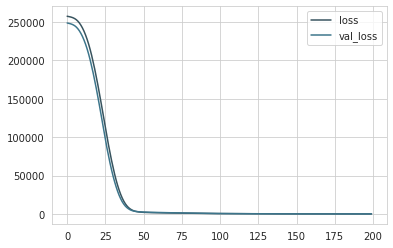

In [99]:
from tensorflow.keras.models import load_model
Ann.save('full_data_project_model.h5') 
losses = pd.DataFrame(Ann.history.history)
losses[['loss','val_loss']].plot()

In [100]:
y_pred6 = Ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.reshape(len(y_test),1)),1))

[[437.54 449.07]
 [489.63 482.6 ]
 [368.11 374.27]
 [514.47 513.15]
 [495.85 502.77]
 [451.03 461.78]
 [457.09 466.42]
 [334.22 327.38]
 [528.1  528.22]
 [666.23 657.02]
 [560.61 571.47]
 [526.48 523.63]
 [551.98 546.56]
 [479.46 467.43]
 [449.88 439.89]
 [430.88 445.06]
 [564.11 553.99]
 [406.8  403.77]
 [600.06 595.8 ]
 [486.62 490.74]
 [719.37 712.4 ]
 [496.66 502.09]
 [410.06 398.16]
 [557.24 570.45]
 [551.76 549.86]
 [403.96 392.99]
 [419.88 419.94]
 [393.46 407.66]
 [548.79 521.14]
 [463.08 463.75]
 [559.9  556.3 ]
 [505.57 506.55]
 [505.79 514.34]
 [463.37 476.77]
 [443.17 418.6 ]
 [399.03 403.82]
 [503.08 506.13]
 [428.85 436.72]
 [570.64 558.95]
 [421.35 421.33]
 [486.92 478.26]
 [603.45 593.92]
 [618.09 632.12]
 [590.33 591.44]
 [448.72 444.29]
 [378.23 392.2 ]
 [558.95 558.43]
 [462.04 447.19]
 [502.62 475.73]
 [399.89 420.74]
 [524.06 527.78]
 [415.07 421.97]
 [578.19 576.03]
 [477.59 460.06]
 [455.99 452.63]
 [442.76 408.64]
 [566.54 557.25]
 [302.72 298.76]
 [562.87 555.0

In [101]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred6))
print('MSE:', metrics.mean_squared_error(y_test, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred6)

MAE: 8.760524680452114
MSE: 122.59824841224886
RMSE: 11.072409331859479


0.9817764830973511

In [102]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# Cross-Validate
kf = KFold(n_splits=10, shuffle=True) # Use for KFold classification
    
oos_y = []
oos_pred = []
R2=[]
fold = 0

for train, test in kf.split(X_train):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X_train[train]
    Y_train = y_train[train]
    x_test = X_train[test]
    Y_test = y_train[test]
    
    
    ann1 = tf.keras.models.Sequential()
    ann1.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=1))
    ann1.compile(optimizer = 'adam', loss = 'mean_squared_error')
    from tensorflow.keras.callbacks import EarlyStopping
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    history=ann1.fit(x=x_train, 
          y=Y_train, 
          epochs=200,
          batch_size = 8,
          validation_data=(x_test, Y_test),
          callbacks=[early_stop]
          )
    
    
    pred = ann1.predict(x_test)
    
    oos_y.append(Y_test)
    oos_pred.append(pred)    

    # Measure this fold's RMSE
    from sklearn.metrics import mean_squared_error
    score = np.sqrt(mean_squared_error(Y_test,pred))
    print(f"Fold score (RMSE): {score}")
    from sklearn.metrics import r2_score
    r2=r2_score(Y_test,pred)
    print("Fold score (R2_Score):",r2)
    R2.append(r2)

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(mean_squared_error(oos_pred,oos_y))
r2 = r2_score(oos_pred,oos_y)
print(f"Final, out of sample score (RMSE): {score}")   
print(f"Final, out of sample score (R2_Score): ",r2)   

# Write the cross-validated prediction (from the last neural network)
holdout_pred = ann1.predict(X_test)
r2 = r2_score(holdout_pred,y_test)
score = np.sqrt(mean_squared_error(holdout_pred,y_test))
print(f"Holdout score (RMSE): {score}")
print(f"Final, out of sample score (R2_Score): ",r2)   


Fold #1
Epoch 1/200
45/45 [==============================] - 0s 5ms/step - loss: 256867.0625 - val_loss: 264616.1875
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 256595.6719 - val_loss: 264352.9375
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 256332.5156 - val_loss: 264045.1875
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 255982.8438 - val_loss: 263607.8125
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 255462.5312 - val_loss: 262981.8750
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 254758.6719 - val_loss: 262119.0938
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 253751.9375 - val_loss: 260798.2031
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 252291.0469 - val_loss: 258921.3438
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 250255.2031 - val_loss: 256447.4062
Epoch 10/20

Epoch 77/200
45/45 [==============================] - 0s 2ms/step - loss: 2049.5259 - val_loss: 2461.4084
Epoch 78/200
45/45 [==============================] - 0s 2ms/step - loss: 1992.1681 - val_loss: 2398.2319
Epoch 79/200
45/45 [==============================] - 0s 2ms/step - loss: 1924.7332 - val_loss: 2334.9116
Epoch 80/200
45/45 [==============================] - 0s 2ms/step - loss: 1868.6686 - val_loss: 2263.1375
Epoch 81/200
45/45 [==============================] - 0s 2ms/step - loss: 1809.4626 - val_loss: 2233.8052
Epoch 82/200
45/45 [==============================] - 0s 2ms/step - loss: 1750.5029 - val_loss: 2158.5149
Epoch 83/200
45/45 [==============================] - 0s 2ms/step - loss: 1696.8613 - val_loss: 2116.0886
Epoch 84/200
45/45 [==============================] - 0s 2ms/step - loss: 1645.3101 - val_loss: 2042.5579
Epoch 85/200
45/45 [==============================] - 0s 2ms/step - loss: 1592.0396 - val_loss: 2000.6110
Epoch 86/200
45/45 [==========================

45/45 [==============================] - 0s 2ms/step - loss: 252.4358 - val_loss: 481.2404
Epoch 155/200
45/45 [==============================] - 0s 2ms/step - loss: 246.5012 - val_loss: 479.4776
Epoch 156/200
45/45 [==============================] - 0s 2ms/step - loss: 241.4868 - val_loss: 473.8105
Epoch 157/200
45/45 [==============================] - 0s 2ms/step - loss: 237.9743 - val_loss: 460.2395
Epoch 158/200
45/45 [==============================] - 0s 2ms/step - loss: 233.2773 - val_loss: 440.9222
Epoch 159/200
45/45 [==============================] - 0s 2ms/step - loss: 227.7862 - val_loss: 445.0955
Epoch 160/200
45/45 [==============================] - 0s 2ms/step - loss: 224.3576 - val_loss: 443.8703
Epoch 161/200
45/45 [==============================] - 0s 2ms/step - loss: 219.4639 - val_loss: 432.1581
Epoch 162/200
45/45 [==============================] - 0s 2ms/step - loss: 215.6503 - val_loss: 422.3578
Epoch 163/200
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 2ms/step - loss: 30470.8418 - val_loss: 26516.9102
Epoch 31/200
45/45 [==============================] - 0s 2ms/step - loss: 24746.7578 - val_loss: 22132.1523
Epoch 32/200
45/45 [==============================] - 0s 2ms/step - loss: 20054.5820 - val_loss: 18558.1367
Epoch 33/200
45/45 [==============================] - 0s 2ms/step - loss: 16287.9805 - val_loss: 15817.1875
Epoch 34/200
45/45 [==============================] - 0s 2ms/step - loss: 13331.8213 - val_loss: 13673.1348
Epoch 35/200
45/45 [==============================] - 0s 2ms/step - loss: 11040.7959 - val_loss: 12032.7021
Epoch 36/200
45/45 [==============================] - 0s 2ms/step - loss: 9331.8955 - val_loss: 10750.2949
Epoch 37/200
45/45 [==============================] - 0s 2ms/step - loss: 8009.1846 - val_loss: 9797.3691
Epoch 38/200
45/45 [==============================] - 0s 2ms/step - loss: 7044.5088 - val_loss: 9038.8115
Epoch 39/200
45/45 [==========================

45/45 [==============================] - 0s 2ms/step - loss: 663.3448 - val_loss: 982.2033
Epoch 108/200
45/45 [==============================] - 0s 2ms/step - loss: 645.6171 - val_loss: 947.2592
Epoch 109/200
45/45 [==============================] - 0s 2ms/step - loss: 628.6194 - val_loss: 928.2526
Epoch 110/200
45/45 [==============================] - 0s 2ms/step - loss: 612.3113 - val_loss: 895.6457
Epoch 111/200
45/45 [==============================] - 0s 2ms/step - loss: 596.9297 - val_loss: 871.3615
Epoch 112/200
45/45 [==============================] - 0s 2ms/step - loss: 582.6207 - val_loss: 856.1572
Epoch 113/200
45/45 [==============================] - 0s 2ms/step - loss: 566.5958 - val_loss: 822.8211
Epoch 114/200
45/45 [==============================] - 0s 2ms/step - loss: 552.7720 - val_loss: 804.2640
Epoch 115/200
45/45 [==============================] - 0s 2ms/step - loss: 536.3179 - val_loss: 777.9393
Epoch 116/200
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 4ms/step - loss: 146.0416 - val_loss: 167.3174
Epoch 186/200
45/45 [==============================] - 0s 4ms/step - loss: 145.4367 - val_loss: 164.5786
Epoch 187/200
45/45 [==============================] - 0s 3ms/step - loss: 143.4050 - val_loss: 170.4576
Epoch 188/200
45/45 [==============================] - 0s 2ms/step - loss: 142.8213 - val_loss: 166.8086
Epoch 189/200
45/45 [==============================] - 0s 2ms/step - loss: 140.3769 - val_loss: 159.1269
Epoch 190/200
45/45 [==============================] - 0s 2ms/step - loss: 139.4632 - val_loss: 159.8630
Epoch 191/200
45/45 [==============================] - 0s 2ms/step - loss: 138.5717 - val_loss: 157.9083
Epoch 192/200
45/45 [==============================] - 0s 2ms/step - loss: 137.1844 - val_loss: 158.8845
Epoch 193/200
45/45 [==============================] - 0s 2ms/step - loss: 136.9730 - val_loss: 158.3063
Epoch 194/200
45/45 [==============================] - 0s 2ms/step - 

Epoch 60/200
45/45 [==============================] - 0s 2ms/step - loss: 23220.3906 - val_loss: 20921.1992
Epoch 61/200
45/45 [==============================] - 0s 2ms/step - loss: 20629.1836 - val_loss: 18715.0371
Epoch 62/200
45/45 [==============================] - 0s 2ms/step - loss: 18262.4551 - val_loss: 16689.4648
Epoch 63/200
45/45 [==============================] - 0s 2ms/step - loss: 16084.0527 - val_loss: 14776.1924
Epoch 64/200
45/45 [==============================] - 0s 2ms/step - loss: 14090.0098 - val_loss: 12924.3877
Epoch 65/200
45/45 [==============================] - 0s 2ms/step - loss: 12262.4434 - val_loss: 11206.9395
Epoch 66/200
45/45 [==============================] - 0s 2ms/step - loss: 10608.8750 - val_loss: 9715.1152
Epoch 67/200
45/45 [==============================] - 0s 2ms/step - loss: 9152.8232 - val_loss: 8318.5234
Epoch 68/200
45/45 [==============================] - 0s 2ms/step - loss: 7838.8403 - val_loss: 7110.1123
Epoch 69/200
45/45 [=============

45/45 [==============================] - 0s 2ms/step - loss: 245.6493 - val_loss: 77.2489
Epoch 139/200
45/45 [==============================] - 0s 2ms/step - loss: 242.4861 - val_loss: 76.6903
Epoch 140/200
45/45 [==============================] - 0s 2ms/step - loss: 238.2183 - val_loss: 74.8100
Epoch 141/200
45/45 [==============================] - 0s 2ms/step - loss: 235.3094 - val_loss: 74.9132
Epoch 142/200
45/45 [==============================] - 0s 2ms/step - loss: 232.1574 - val_loss: 73.5459
Epoch 143/200
45/45 [==============================] - 0s 2ms/step - loss: 228.3569 - val_loss: 72.2762
Epoch 144/200
45/45 [==============================] - 0s 2ms/step - loss: 225.0152 - val_loss: 71.7065
Epoch 145/200
45/45 [==============================] - 0s 2ms/step - loss: 222.0334 - val_loss: 70.6870
Epoch 146/200
45/45 [==============================] - 0s 2ms/step - loss: 218.8624 - val_loss: 70.1049
Epoch 147/200
45/45 [==============================] - 0s 2ms/step - loss: 216

45/45 [==============================] - 0s 2ms/step - loss: 214420.5938 - val_loss: 229061.5000
Epoch 16/200
45/45 [==============================] - 0s 2ms/step - loss: 205321.7812 - val_loss: 220810.0469
Epoch 17/200
45/45 [==============================] - 0s 2ms/step - loss: 195372.8594 - val_loss: 211759.3438
Epoch 18/200
45/45 [==============================] - 0s 2ms/step - loss: 184704.7812 - val_loss: 201980.9688
Epoch 19/200
45/45 [==============================] - 0s 2ms/step - loss: 173518.4531 - val_loss: 191357.4688
Epoch 20/200
45/45 [==============================] - 0s 2ms/step - loss: 161875.3594 - val_loss: 180408.9062
Epoch 21/200
45/45 [==============================] - 0s 2ms/step - loss: 149866.1719 - val_loss: 168811.0469
Epoch 22/200
45/45 [==============================] - 0s 2ms/step - loss: 137317.6875 - val_loss: 156494.7188
Epoch 23/200
45/45 [==============================] - 0s 2ms/step - loss: 124417.9453 - val_loss: 143921.1562
Epoch 24/200
45/45 [===

45/45 [==============================] - 0s 2ms/step - loss: 910.7060 - val_loss: 1055.9183
Epoch 92/200
45/45 [==============================] - 0s 2ms/step - loss: 886.8203 - val_loss: 1034.9681
Epoch 93/200
45/45 [==============================] - 0s 2ms/step - loss: 862.3637 - val_loss: 1007.5404
Epoch 94/200
45/45 [==============================] - 0s 2ms/step - loss: 836.9400 - val_loss: 984.5226
Epoch 95/200
45/45 [==============================] - 0s 2ms/step - loss: 817.1443 - val_loss: 950.3053
Epoch 96/200
45/45 [==============================] - 0s 2ms/step - loss: 790.9404 - val_loss: 933.9208
Epoch 97/200
45/45 [==============================] - 0s 2ms/step - loss: 771.1069 - val_loss: 905.4039
Epoch 98/200
45/45 [==============================] - 0s 3ms/step - loss: 749.1754 - val_loss: 887.3112
Epoch 99/200
45/45 [==============================] - 0s 3ms/step - loss: 729.9402 - val_loss: 860.8273
Epoch 100/200
45/45 [==============================] - 0s 3ms/step - loss:

45/45 [==============================] - 0s 2ms/step - loss: 171.8135 - val_loss: 165.7482
Epoch 170/200
45/45 [==============================] - 0s 2ms/step - loss: 170.2719 - val_loss: 162.9178
Epoch 171/200
45/45 [==============================] - 0s 2ms/step - loss: 167.3273 - val_loss: 161.9336
Epoch 172/200
45/45 [==============================] - 0s 2ms/step - loss: 166.6341 - val_loss: 158.9836
Epoch 173/200
45/45 [==============================] - 0s 2ms/step - loss: 164.4501 - val_loss: 155.3435
Epoch 174/200
45/45 [==============================] - 0s 2ms/step - loss: 161.7964 - val_loss: 156.1452
Epoch 175/200
45/45 [==============================] - 0s 2ms/step - loss: 160.3100 - val_loss: 150.8573
Epoch 176/200
45/45 [==============================] - 0s 2ms/step - loss: 159.1915 - val_loss: 148.9551
Epoch 177/200
45/45 [==============================] - 0s 2ms/step - loss: 157.8167 - val_loss: 146.7988
Epoch 178/200
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 2ms/step - loss: 138563.5938 - val_loss: 139505.2031
Epoch 38/200
45/45 [==============================] - 0s 2ms/step - loss: 131856.1719 - val_loss: 132402.0312
Epoch 39/200
45/45 [==============================] - 0s 2ms/step - loss: 125100.5000 - val_loss: 125423.8125
Epoch 40/200
45/45 [==============================] - 0s 2ms/step - loss: 118377.5781 - val_loss: 118523.6484
Epoch 41/200
45/45 [==============================] - 0s 2ms/step - loss: 111762.9297 - val_loss: 111552.6719
Epoch 42/200
45/45 [==============================] - 0s 2ms/step - loss: 105165.5312 - val_loss: 104851.3906
Epoch 43/200
45/45 [==============================] - 0s 2ms/step - loss: 98736.0469 - val_loss: 98136.7344
Epoch 44/200
45/45 [==============================] - 0s 2ms/step - loss: 92380.2266 - val_loss: 91633.7344
Epoch 45/200
45/45 [==============================] - 0s 2ms/step - loss: 86190.3984 - val_loss: 85276.2109
Epoch 46/200
45/45 [=========

45/45 [==============================] - 0s 2ms/step - loss: 1132.5476 - val_loss: 840.6948
Epoch 114/200
45/45 [==============================] - 0s 2ms/step - loss: 1107.8501 - val_loss: 817.8871
Epoch 115/200
45/45 [==============================] - 0s 2ms/step - loss: 1084.6543 - val_loss: 789.7982
Epoch 116/200
45/45 [==============================] - 0s 2ms/step - loss: 1059.8481 - val_loss: 768.6271
Epoch 117/200
45/45 [==============================] - 0s 2ms/step - loss: 1040.0421 - val_loss: 745.5059
Epoch 118/200
45/45 [==============================] - 0s 2ms/step - loss: 1014.4914 - val_loss: 724.9733
Epoch 119/200
45/45 [==============================] - 0s 2ms/step - loss: 992.1176 - val_loss: 702.3974
Epoch 120/200
45/45 [==============================] - 0s 2ms/step - loss: 972.1850 - val_loss: 680.8411
Epoch 121/200
45/45 [==============================] - 0s 2ms/step - loss: 951.7391 - val_loss: 660.3729
Epoch 122/200
45/45 [==============================] - 0s 2ms/s

45/45 [==============================] - 0s 2ms/step - loss: 204.7218 - val_loss: 121.2145
Epoch 192/200
45/45 [==============================] - 0s 2ms/step - loss: 201.7951 - val_loss: 120.0210
Epoch 193/200
45/45 [==============================] - 0s 2ms/step - loss: 198.4822 - val_loss: 119.7048
Epoch 194/200
45/45 [==============================] - 0s 2ms/step - loss: 195.2320 - val_loss: 119.5813
Epoch 195/200
45/45 [==============================] - 0s 2ms/step - loss: 192.5718 - val_loss: 122.5046
Epoch 196/200
45/45 [==============================] - 0s 2ms/step - loss: 190.8766 - val_loss: 122.7684
Epoch 197/200
45/45 [==============================] - 0s 2ms/step - loss: 186.7110 - val_loss: 120.7149
Epoch 198/200
45/45 [==============================] - 0s 2ms/step - loss: 184.3488 - val_loss: 122.0363
Epoch 199/200
45/45 [==============================] - 0s 2ms/step - loss: 182.0179 - val_loss: 123.5528
Epoch 200/200
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 2ms/step - loss: 5534.7280 - val_loss: 5316.1846
Epoch 60/200
45/45 [==============================] - 0s 2ms/step - loss: 4811.9526 - val_loss: 4591.5303
Epoch 61/200
45/45 [==============================] - 0s 2ms/step - loss: 4192.8979 - val_loss: 3978.1138
Epoch 62/200
45/45 [==============================] - 0s 2ms/step - loss: 3661.3687 - val_loss: 3425.8379
Epoch 63/200
45/45 [==============================] - 0s 2ms/step - loss: 3205.3972 - val_loss: 2974.0500
Epoch 64/200
45/45 [==============================] - 0s 2ms/step - loss: 2827.2234 - val_loss: 2590.7432
Epoch 65/200
45/45 [==============================] - 0s 2ms/step - loss: 2513.1926 - val_loss: 2261.6387
Epoch 66/200
45/45 [==============================] - 0s 2ms/step - loss: 2242.9631 - val_loss: 2005.7288
Epoch 67/200
45/45 [==============================] - 0s 2ms/step - loss: 2029.3594 - val_loss: 1778.6404
Epoch 68/200
45/45 [==============================] - 0s 2m

45/45 [==============================] - 0s 3ms/step - loss: 285.5286 - val_loss: 207.3315
Epoch 138/200
45/45 [==============================] - 0s 2ms/step - loss: 280.0896 - val_loss: 202.5970
Epoch 139/200
45/45 [==============================] - 0s 2ms/step - loss: 274.1429 - val_loss: 199.2652
Epoch 140/200
45/45 [==============================] - 0s 2ms/step - loss: 269.4583 - val_loss: 197.8579
Epoch 141/200
45/45 [==============================] - 0s 2ms/step - loss: 264.1607 - val_loss: 193.8289
Epoch 142/200
45/45 [==============================] - 0s 2ms/step - loss: 259.0219 - val_loss: 190.5514
Epoch 143/200
45/45 [==============================] - 0s 2ms/step - loss: 254.1581 - val_loss: 186.5273
Epoch 144/200
45/45 [==============================] - 0s 2ms/step - loss: 250.1955 - val_loss: 184.8951
Epoch 145/200
45/45 [==============================] - 0s 2ms/step - loss: 244.2986 - val_loss: 179.0372
Epoch 146/200
45/45 [==============================] - 0s 2ms/step - 

Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 251856.1719 - val_loss: 245121.9688
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 249141.4844 - val_loss: 242281.0312
Epoch 9/200
45/45 [==============================] - 0s 4ms/step - loss: 245663.5781 - val_loss: 238702.4062
Epoch 10/200
45/45 [==============================] - 0s 2ms/step - loss: 241349.7812 - val_loss: 234462.0938
Epoch 11/200
45/45 [==============================] - 0s 3ms/step - loss: 236207.3594 - val_loss: 229310.5781
Epoch 12/200
45/45 [==============================] - 0s 3ms/step - loss: 230120.1406 - val_loss: 223251.5469
Epoch 13/200
45/45 [==============================] - 0s 3ms/step - loss: 222990.1719 - val_loss: 216268.5000
Epoch 14/200
45/45 [==============================] - 0s 4ms/step - loss: 214828.9375 - val_loss: 208104.8438
Epoch 15/200
45/45 [==============================] - 0s 3ms/step - loss: 205597.3750 - val_loss: 199151.0312
Epoch 16/200


45/45 [==============================] - 0s 2ms/step - loss: 1279.3220 - val_loss: 2171.4751
Epoch 84/200
45/45 [==============================] - 0s 2ms/step - loss: 1240.7961 - val_loss: 2109.5352
Epoch 85/200
45/45 [==============================] - 0s 2ms/step - loss: 1204.1843 - val_loss: 2046.2019
Epoch 86/200
45/45 [==============================] - 0s 2ms/step - loss: 1168.1416 - val_loss: 1987.7129
Epoch 87/200
45/45 [==============================] - 0s 2ms/step - loss: 1131.9452 - val_loss: 1929.5798
Epoch 88/200
45/45 [==============================] - 0s 2ms/step - loss: 1096.8027 - val_loss: 1872.6807
Epoch 89/200
45/45 [==============================] - 0s 3ms/step - loss: 1066.5486 - val_loss: 1823.0022
Epoch 90/200
45/45 [==============================] - 0s 3ms/step - loss: 1031.5454 - val_loss: 1769.6451
Epoch 91/200
45/45 [==============================] - 0s 3ms/step - loss: 1002.1349 - val_loss: 1724.8435
Epoch 92/200
45/45 [==============================] - 0s 3m

Epoch 161/200
45/45 [==============================] - 0s 2ms/step - loss: 179.3177 - val_loss: 328.2034
Epoch 162/200
45/45 [==============================] - 0s 2ms/step - loss: 175.7655 - val_loss: 324.6072
Epoch 163/200
45/45 [==============================] - 0s 2ms/step - loss: 172.9385 - val_loss: 320.7623
Epoch 164/200
45/45 [==============================] - 0s 2ms/step - loss: 170.6058 - val_loss: 310.6381
Epoch 165/200
45/45 [==============================] - 0s 2ms/step - loss: 167.8018 - val_loss: 302.9880
Epoch 166/200
45/45 [==============================] - 0s 2ms/step - loss: 165.5624 - val_loss: 297.6797
Epoch 167/200
45/45 [==============================] - 0s 2ms/step - loss: 162.3530 - val_loss: 292.8875
Epoch 168/200
45/45 [==============================] - 0s 2ms/step - loss: 160.5164 - val_loss: 289.6522
Epoch 169/200
45/45 [==============================] - 0s 2ms/step - loss: 159.0042 - val_loss: 281.8393
Epoch 170/200
45/45 [==============================] - 

Epoch 30/200
45/45 [==============================] - 0s 2ms/step - loss: 45525.5742 - val_loss: 49535.0391
Epoch 31/200
45/45 [==============================] - 0s 2ms/step - loss: 39518.1602 - val_loss: 43451.0625
Epoch 32/200
45/45 [==============================] - 0s 2ms/step - loss: 34306.2500 - val_loss: 38195.6367
Epoch 33/200
45/45 [==============================] - 0s 2ms/step - loss: 29846.5996 - val_loss: 33416.0156
Epoch 34/200
45/45 [==============================] - 0s 2ms/step - loss: 26000.5449 - val_loss: 29345.8652
Epoch 35/200
45/45 [==============================] - 0s 2ms/step - loss: 22760.0977 - val_loss: 25693.6602
Epoch 36/200
45/45 [==============================] - 0s 2ms/step - loss: 19945.4082 - val_loss: 22666.5957
Epoch 37/200
45/45 [==============================] - 0s 2ms/step - loss: 17591.7520 - val_loss: 19958.0371
Epoch 38/200
45/45 [==============================] - 0s 2ms/step - loss: 15559.3623 - val_loss: 17668.9277
Epoch 39/200
45/45 [========

45/45 [==============================] - 0s 2ms/step - loss: 862.7911 - val_loss: 1964.6035
Epoch 108/200
45/45 [==============================] - 0s 2ms/step - loss: 841.5705 - val_loss: 1900.4105
Epoch 109/200
45/45 [==============================] - 0s 2ms/step - loss: 819.0791 - val_loss: 1866.5449
Epoch 110/200
45/45 [==============================] - 0s 2ms/step - loss: 796.7821 - val_loss: 1820.7224
Epoch 111/200
45/45 [==============================] - 0s 2ms/step - loss: 777.7798 - val_loss: 1778.1744
Epoch 112/200
45/45 [==============================] - 0s 2ms/step - loss: 757.4030 - val_loss: 1732.3176
Epoch 113/200
45/45 [==============================] - 0s 2ms/step - loss: 738.3001 - val_loss: 1688.8910
Epoch 114/200
45/45 [==============================] - 0s 2ms/step - loss: 718.6588 - val_loss: 1649.1559
Epoch 115/200
45/45 [==============================] - 0s 2ms/step - loss: 701.4306 - val_loss: 1606.0747
Epoch 116/200
45/45 [==============================] - 0s 2m

Epoch 185/200
45/45 [==============================] - 0s 2ms/step - loss: 176.1113 - val_loss: 319.6244
Epoch 186/200
45/45 [==============================] - 0s 2ms/step - loss: 173.0178 - val_loss: 312.8069
Epoch 187/200
45/45 [==============================] - 0s 2ms/step - loss: 171.2485 - val_loss: 307.9160
Epoch 188/200
45/45 [==============================] - 0s 2ms/step - loss: 170.0020 - val_loss: 304.1449
Epoch 189/200
45/45 [==============================] - 0s 2ms/step - loss: 167.8044 - val_loss: 298.2578
Epoch 190/200
45/45 [==============================] - 0s 4ms/step - loss: 165.5774 - val_loss: 294.6987
Epoch 191/200
45/45 [==============================] - 0s 3ms/step - loss: 164.4212 - val_loss: 289.2047
Epoch 192/200
45/45 [==============================] - 0s 4ms/step - loss: 161.6585 - val_loss: 283.3971
Epoch 193/200
45/45 [==============================] - 0s 4ms/step - loss: 159.9877 - val_loss: 280.0188
Epoch 194/200
45/45 [==============================] - 

45/45 [==============================] - 0s 2ms/step - loss: 3978.0740 - val_loss: 4336.0376
Epoch 54/200
45/45 [==============================] - 0s 2ms/step - loss: 3854.5339 - val_loss: 4200.9624
Epoch 55/200
45/45 [==============================] - 0s 2ms/step - loss: 3735.4216 - val_loss: 4109.2861
Epoch 56/200
45/45 [==============================] - 0s 2ms/step - loss: 3624.0676 - val_loss: 4020.1973
Epoch 57/200
45/45 [==============================] - 0s 2ms/step - loss: 3519.2786 - val_loss: 3921.2402
Epoch 58/200
45/45 [==============================] - 0s 2ms/step - loss: 3413.9534 - val_loss: 3843.4497
Epoch 59/200
45/45 [==============================] - 0s 2ms/step - loss: 3316.3281 - val_loss: 3752.2505
Epoch 60/200
45/45 [==============================] - 0s 2ms/step - loss: 3220.6455 - val_loss: 3690.0996
Epoch 61/200
45/45 [==============================] - 0s 2ms/step - loss: 3125.9714 - val_loss: 3617.1138
Epoch 62/200
45/45 [==============================] - 0s 2m

45/45 [==============================] - 0s 2ms/step - loss: 407.7388 - val_loss: 713.0609
Epoch 131/200
45/45 [==============================] - 0s 2ms/step - loss: 397.0491 - val_loss: 703.8025
Epoch 132/200
45/45 [==============================] - 0s 2ms/step - loss: 389.6125 - val_loss: 687.8958
Epoch 133/200
45/45 [==============================] - 0s 2ms/step - loss: 380.5175 - val_loss: 671.9569
Epoch 134/200
45/45 [==============================] - 0s 2ms/step - loss: 368.4936 - val_loss: 658.7988
Epoch 135/200
45/45 [==============================] - 0s 2ms/step - loss: 361.6617 - val_loss: 646.3592
Epoch 136/200
45/45 [==============================] - 0s 2ms/step - loss: 352.0799 - val_loss: 639.4213
Epoch 137/200
45/45 [==============================] - 0s 2ms/step - loss: 344.1251 - val_loss: 629.3962
Epoch 138/200
45/45 [==============================] - 0s 2ms/step - loss: 335.5705 - val_loss: 611.7850
Epoch 139/200
45/45 [==============================] - 0s 2ms/step - 

Fold score (RMSE): 16.559936532831234
Fold score (R2_Score): 0.9548391992851014
Fold #10
Epoch 1/200
45/45 [==============================] - 0s 5ms/step - loss: 255871.5938 - val_loss: 268590.1562
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 255651.4688 - val_loss: 268356.5000
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 255378.3594 - val_loss: 268037.4062
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 254998.4062 - val_loss: 267592.0938
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 254460.5625 - val_loss: 266951.3750
Epoch 6/200
45/45 [==============================] - 0s 2ms/step - loss: 253701.2500 - val_loss: 266055.1562
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 252651.2656 - val_loss: 264794.7500
Epoch 8/200
45/45 [==============================] - 0s 2ms/step - loss: 251206.9531 - val_loss: 263142.5312
Epoch 9/200
45/45 [====================

45/45 [==============================] - 0s 2ms/step - loss: 1874.7051 - val_loss: 913.4778
Epoch 77/200
45/45 [==============================] - 0s 2ms/step - loss: 1819.2891 - val_loss: 887.7576
Epoch 78/200
45/45 [==============================] - 0s 2ms/step - loss: 1766.8136 - val_loss: 859.4739
Epoch 79/200
45/45 [==============================] - 0s 2ms/step - loss: 1721.1719 - val_loss: 829.9835
Epoch 80/200
45/45 [==============================] - 0s 2ms/step - loss: 1672.9175 - val_loss: 809.9294
Epoch 81/200
45/45 [==============================] - 0s 2ms/step - loss: 1623.9120 - val_loss: 783.6781
Epoch 82/200
45/45 [==============================] - 0s 2ms/step - loss: 1582.1753 - val_loss: 759.8256
Epoch 83/200
45/45 [==============================] - 0s 2ms/step - loss: 1531.9629 - val_loss: 737.8873
Epoch 84/200
45/45 [==============================] - 0s 2ms/step - loss: 1489.9602 - val_loss: 719.7184
Epoch 85/200
45/45 [==============================] - 0s 2ms/step - 

45/45 [==============================] - 0s 2ms/step - loss: 244.5127 - val_loss: 111.2329
Epoch 155/200
45/45 [==============================] - 0s 2ms/step - loss: 239.6225 - val_loss: 112.9652
Epoch 156/200
45/45 [==============================] - 0s 2ms/step - loss: 235.3952 - val_loss: 110.8487
Epoch 157/200
45/45 [==============================] - 0s 2ms/step - loss: 230.4842 - val_loss: 109.6051
Epoch 158/200
45/45 [==============================] - 0s 2ms/step - loss: 226.3305 - val_loss: 106.9752
Epoch 159/200
45/45 [==============================] - 0s 2ms/step - loss: 223.1404 - val_loss: 107.9547
Epoch 160/200
45/45 [==============================] - 0s 2ms/step - loss: 219.3347 - val_loss: 106.4831
Epoch 161/200
45/45 [==============================] - 0s 2ms/step - loss: 216.3840 - val_loss: 103.9702
Epoch 162/200
45/45 [==============================] - 0s 2ms/step - loss: 212.8295 - val_loss: 103.9347
Epoch 163/200
45/45 [==============================] - 0s 2ms/step - 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
oos_pred

In [ ]:
oos_y

In [ ]:
mean=sum(R2)/len(R2)

In [ ]:
variance = sum([((x - mean) ** 2) for x in R2]) / len(R2) 
res = variance ** 0.5

In [ ]:
res*100